In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn import metrics, naive_bayes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from keras import datasets, layers, models


from keras.layers import Dense
from keras import datasets, layers, models
import math

from sklearn.cluster import KMeans
import tensorflow as tf
from keras import layers, datasets, models
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [ ]:
df = pd.read_excel("/content/Fianal-Exam-Set2.xlsx")

In [ ]:
df.head(5)

Y     X1     X2     X3     X4     X5     X6     X7     X8     X9  ...  \
0  14.75  14.75  14.71  14.73  14.71  14.79  14.86  14.86  14.91  14.54  ...   
1  14.48  14.75  14.75  14.71  14.73  14.71  14.79  14.86  14.86  14.91  ...   
2  14.35  14.48  14.75  14.75  14.71  14.73  14.71  14.79  14.86  14.86  ...   
3  14.41  14.35  14.48  14.75  14.75  14.71  14.73  14.71  14.79  14.86  ...   
4  14.37  14.41  14.35  14.48  14.75  14.75  14.71  14.73  14.71  14.79  ...   

     X21    X22    X23    X24    X25    X26    X27    X28    X29    X30  
0  14.95  14.92  14.82  15.20  15.17  15.17  15.04  15.04  15.06  15.02  
1  14.89  14.95  14.92  14.82  15.20  15.17  15.17  15.04  15.04  15.06  
2  14.92  14.89  14.95  14.92  14.82  15.20  15.17  15.17  15.04  15.04  
3  14.94  14.92  14.89  14.95  14.92  14.82  15.20  15.17  15.17  15.04  
4  14.96  14.94  14.92  14.89  14.95  14.92  14.82  15.20  15.17  15.17  

[5 rows x 31 columns]

# **Data Understanding**

# **Preprocessing**

In [ ]:
import pandas as pd

# Load your data into DataFrame 'df'
# df = pd.read_csv('your_data.csv')  # Example if you're reading from a CSV file

# Check NaN counts before dropping
nan_counts = df.isna().sum()
print("NaN counts by column before dropping rows:")
print(nan_counts)

NaN counts by column before dropping rows:
Y      1
X1     1
X2     1
X3     1
X4     1
X5     1
X6     1
X7     1
X8     1
X9     1
X10    1
X11    1
X12    1
X13    1
X14    1
X15    1
X16    1
X17    1
X18    1
X19    1
X20    1
X21    1
X22    1
X23    1
X24    1
X25    1
X26    1
X27    1
X28    1
X29    1
X30    1
dtype: int64


In [ ]:
# Display rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print("Rows with NaN values:")
print(nan_rows)


Rows with NaN values:
          Y     X1     X2     X3     X4     X5     X6     X7     X8     X9  \
1141    NaN  23.67  23.84  23.58  23.81  23.89  23.49  23.08  22.30  22.22   
1142  24.33    NaN  23.67  23.84  23.58  23.81  23.89  23.49  23.08  22.30   
1143  24.67  24.33    NaN  23.67  23.84  23.58  23.81  23.89  23.49  23.08   
1144  24.93  24.67  24.33    NaN  23.67  23.84  23.58  23.81  23.89  23.49   
1145  25.07  24.93  24.67  24.33    NaN  23.67  23.84  23.58  23.81  23.89   
1146  25.29  25.07  24.93  24.67  24.33    NaN  23.67  23.84  23.58  23.81   
1147  25.50  25.29  25.07  24.93  24.67  24.33    NaN  23.67  23.84  23.58   
1148  24.56  25.50  25.29  25.07  24.93  24.67  24.33    NaN  23.67  23.84   
1149  24.20  24.56  25.50  25.29  25.07  24.93  24.67  24.33    NaN  23.67   
1150  23.89  24.20  24.56  25.50  25.29  25.07  24.93  24.67  24.33    NaN   
1151  23.73  23.89  24.20  24.56  25.50  25.29  25.07  24.93  24.67  24.33   
1152  22.97  23.73  23.89  24.20  24.56  2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1228 non-null   float64
 1   X1      1228 non-null   float64
 2   X2      1228 non-null   float64
 3   X3      1228 non-null   float64
 4   X4      1228 non-null   float64
 5   X5      1228 non-null   float64
 6   X6      1228 non-null   float64
 7   X7      1228 non-null   float64
 8   X8      1228 non-null   float64
 9   X9      1228 non-null   float64
 10  X10     1228 non-null   float64
 11  X11     1228 non-null   float64
 12  X12     1228 non-null   float64
 13  X13     1228 non-null   float64
 14  X14     1228 non-null   float64
 15  X15     1228 non-null   float64
 16  X16     1228 non-null   float64
 17  X17     1228 non-null   float64
 18  X18     1228 non-null   float64
 19  X19     1228 non-null   float64
 20  X20     1228 non-null   float64
 21  X21     1228 non-null   float64
 22  

In [ ]:
df.dropna(inplace=True)

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Y, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30]
Index: []

[0 rows x 31 columns]


# **Partitioning**

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split



# # Split the data into training (80%) and testing (20%)
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)  # random_state for reproducibility

# # Export train and test dataframes to Excel files
# train_df.to_excel('/content/TrainingData2.xlsx', index=False)
# test_df.to_excel('/content/TestingData2.xlsx', index=False)

# "Training and testing data have been exported to Excel files successfully."

In [ ]:
train_df = pd.read_excel("/content/TrainingData2.xlsx")
test_df = pd.read_excel("/content/TestingData2.xlsx")
X_train = train_df.drop(columns=['Y']).values  # Features train
y_train = train_df['Y'].values  # Target train

X_test = test_df.drop(columns=['Y']).values  # Features test
y_test = test_df['Y'].values  # Target test

# train_df now contains 80% of the original DataFrame, randomly sampled
# test_df now contains the remaining 20% of the original DataFrame
print("Training DataFrame shape:", train_df.shape)
print("Testing DataFrame shape:", test_df.shape)
print(f"Shape of partitions:\n X_train: {X_train.shape}, \n X_test: {X_test.shape}")

Training DataFrame shape: (958, 31)
Testing DataFrame shape: (240, 31)
Shape of partitions:
 X_train: (958, 30), 
 X_test: (240, 30)


In [ ]:
df.shape

(1198, 31)

# **Statistical Model**

# **Train linear regression model:**

In [ ]:
# create linear regression object
linear_reg = linear_model.LinearRegression(fit_intercept=True)
# fit the linear regression model to your training data
linear_reg.fit(X_train, y_train)
print(f"intercept:{linear_reg.intercept_}\n")
print(f"Estiamted coefficients:{linear_reg.coef_}")

intercept:0.26328492612607945

Estiamted coefficients:[ 0.93567656  0.10150702 -0.05991236 -0.03259918  0.06483268 -0.09183363
  0.03179132  0.07053715  0.00097763 -0.04941848  0.00978014  0.02217405
  0.07414503 -0.13984545 -0.02671262  0.14877269 -0.13336105  0.07468454
 -0.04294315  0.04604471 -0.01134979 -0.0512252   0.03037838 -0.01892212
  0.07008345 -0.11491878  0.12315587  0.10673824 -0.17838002  0.02866013]


Linear Regression Equation:  ŷ =β0+β1X1+...+βkXk



# **Test the prediction performance:**

In [ ]:
import numpy as np
from sklearn import metrics

y_pred_LG = linear_reg.predict(X_test)

# Root Mean Squared Error (RMSE)
RMSE_sk = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LG))
print(f"RMSE_LG: {RMSE_sk}")

# Mean Absolute Deviation (MAD)
MAD_sk = np.mean(np.abs(y_test - y_pred_LG))
print(f"MAD_LG: {MAD_sk}")

MAE_sk = metrics.mean_absolute_error(y_test, y_pred_LG)
print(f"MAE_LG: {MAE_sk}")

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred_LG):
    return np.mean(np.abs((y_true - y_pred_LG) / y_true)) * 100
MAPE_sk = mean_absolute_percentage_error(y_test, y_pred_LG)
print(f"MAPE_LG: {MAPE_sk}")


RMSE_LG: 0.47690732063784896
MAD_LG: 0.3249804254606177
MAE_LG: 0.3249804254606177
MAPE_LG: 1.5202237683884512


# **Statistical Analysis of Linear Regression**

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train) # Add a column of ones to an array to estimate the intercept.
model = sm.OLS(y_train, X_train) #endog: dependent variable, exog: regressors
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2029.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:10:20   Log-Likelihood:                -579.54
No. Observations:                 958   AIC:                             1221.
Df Residuals:                     927   BIC:                             1372.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2633      0.091      2.879      0.0

Random search

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 0.47690732063784896
MAE: 0.3249804254606177
MAD: 0.3249804254606177
MAPE: 1.5202237683884512
Best Parameters: {'fit_intercept': True}


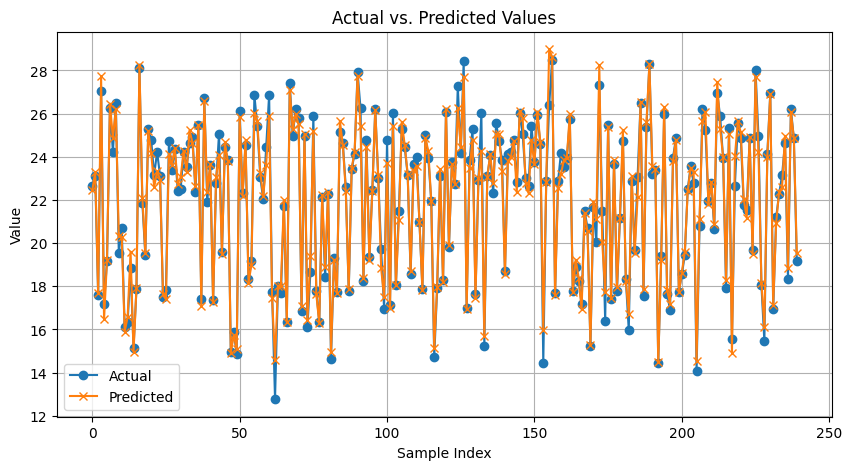

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    # Add more hyperparameters to tune if needed
}

# Define the Randomized Search
random_search = RandomizedSearchCV(linear_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)


plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS2.xlsx', index=False)


Best LR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RMSE: 0.47690732063784896
MAE: 0.3249804254606177
MAD: 0.3249804254606177
MAPE: 1.5202237683884512
Best Parameters: {'fit_intercept': True}
Coefficients: [ 0.93567656  0.10150702 -0.05991236 -0.03259918  0.06483268 -0.09183363
  0.03179132  0.07053715  0.00097763 -0.04941848  0.00978014  0.02217405
  0.07414503 -0.13984545 -0.02671262  0.14877269 -0.13336105  0.07468454
 -0.04294315  0.04604471 -0.01134979 -0.0512252   0.03037838 -0.01892212
  0.07008345 -0.11491878  0.12315587  0.10673824 -0.17838002  0.02866013]
Intercept: 0.26328492612607945


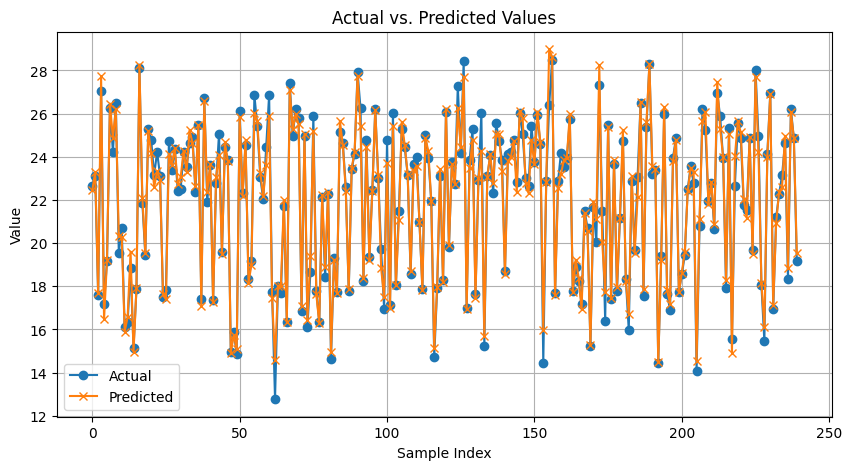

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined in your environment

# Define the linear regression model
linear_reg = LinearRegression()

# Define the parameter grid for Randomized Search
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    # Add more hyperparameters to tune if needed
}

# Define the Randomized Search
random_search = RandomizedSearchCV(linear_reg, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best estimator from Randomized Search
best_estimator = random_search.best_estimator_

# Make predictions
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_pred - y_test))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAD: {mad}')
print(f'MAPE: {mape}')

# Print the best parameters found by Randomized Search
print("Best Parameters:", random_search.best_params_)

# Print the coefficients of the best estimator
print("Coefficients:", best_estimator.coef_)

# If fit_intercept is True, also print the intercept
if best_estimator.fit_intercept:
    print("Intercept:", best_estimator.intercept_)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('linear_regression_Results_DS2.xlsx', index=False)


# **Polynomial Regression**

Degree 1:
X_poly_train shape: (958, 31)
X_poly_test shape: (240, 31)
Degree 2:
X_poly_train shape: (958, 496)
X_poly_test shape: (240, 496)
Degree 3:
X_poly_train shape: (958, 5456)
X_poly_test shape: (240, 5456)
Degree 4:
X_poly_train shape: (958, 46376)
X_poly_test shape: (240, 46376)
Degree 5:
X_poly_train shape: (958, 324632)
X_poly_test shape: (240, 324632)
Best Polynomial degree: 1


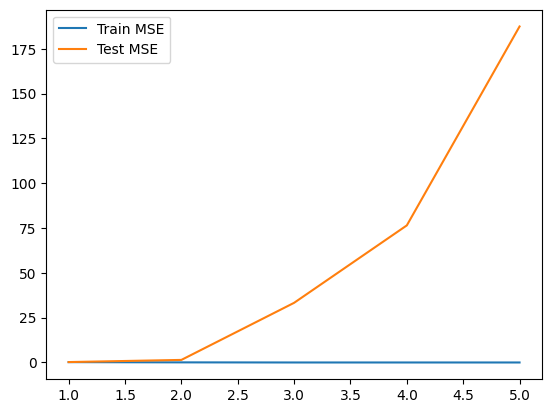

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_MSE = []
test_MSE = []

# Test lower degrees first
max_degree = 5  # Limit the maximum degree to avoid high memory usage
for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    print(f"Degree {degree}:")
    print("X_poly_train shape:", X_poly_train.shape)
    print("X_poly_test shape:", X_poly_test.shape)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    y_test_pred_LP = lin_reg.predict(X_poly_test)

    train_error = mean_squared_error(y_train, y_train_pred_LP)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    train_MSE.append(train_error)
    test_MSE.append(test_error)

print(f'Best Polynomial degree: {test_MSE.index(min(test_MSE)) + 1}')
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.legend()
plt.show()


# **with PCA**

Best Polynomial degree: 5


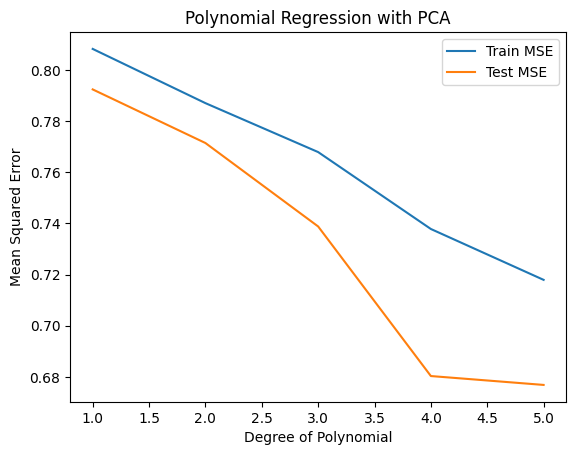

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=0.95)  # Adjust this to your needs

# Apply PCA to the scaled data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Store the train and test MSE for different polynomial degrees
train_MSE = []
test_MSE = []

# Define the maximum degree for polynomial features
max_degree = 5

# Loop over degrees to evaluate the model
for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_train = poly_features.fit_transform(X_train_pca)
    X_poly_test = poly_features.transform(X_test_pca)

    # Fit a linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)

    # Predict and evaluate on the training set
    y_train_pred_LP = lin_reg.predict(X_poly_train)
    train_error = mean_squared_error(y_train, y_train_pred_LP)
    train_MSE.append(train_error)

    # Predict and evaluate on the test set
    y_test_pred_LP = lin_reg.predict(X_poly_test)
    test_error = mean_squared_error(y_test, y_test_pred_LP)
    test_MSE.append(test_error)

# Output the best degree based on test MSE
best_degree_index = test_MSE.index(min(test_MSE))
best_degree = range(1, max_degree + 1)[best_degree_index]
print(f'Best Polynomial degree: {best_degree}')

# Plot the train and test MSE
plt.plot(range(1, max_degree + 1), train_MSE, label='Train MSE')
plt.plot(range(1, max_degree + 1), test_MSE, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression with PCA')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error



# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_LP))

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_LP)

# Calculate MAD (Median Absolute Deviation)
mad = median_absolute_error(y_test, y_test_pred_LP)

# Calculate MAPE - Note: y_test must not contain any zero values for this calculation
mape = np.mean(np.abs((y_test - y_test_pred_LP) / y_test)) * 100

# Print the metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 0.8227008009374631
MAE: 0.6486055972772793
MAD: 0.5725481816036435
MAPE: 3.0710306848308297 %


Random search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import randint
import matplotlib.pyplot as plt

# Define a pipeline for scaling, PCA, and linear regression with polynomial features
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'pca__n_components': randint(1, X_train.shape[1]),  # Assuming X_train has been defined
    'poly__degree': randint(1, 6),  # Polynomial degree from 1 to 5
}

# Create a scorer for mean squared error
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,       # Number of folds in cross-validation
    scoring=mse_scorer,
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Make predictions using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate RMSE for the predictions
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Output RMSE
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'pca__n_components': 12, 'poly__degree': 1}
Train RMSE: 0.4757594184795755
Test RMSE: 0.48555104807442273


Best Polynomial

Test RMSE: 0.485633095614634
Test MAE: 0.33779118050789586
Test MAD: 0.23235704046469152
Test MAPE: 1.5853232077763617%


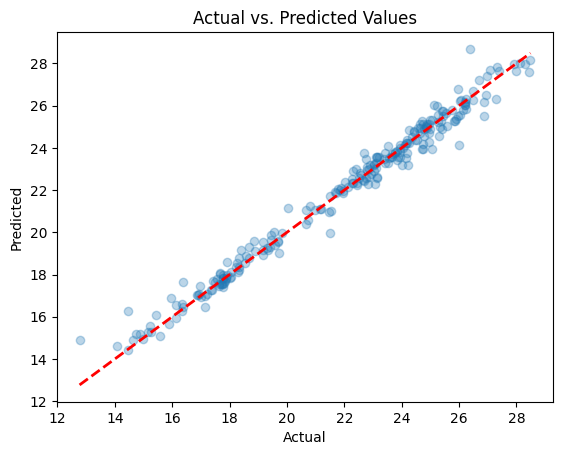

Results saved to Excel file: /content/Polynomial_regression_Results_DS2.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df is your DataFrame and it has been preprocessed appropriately
# X = df.drop(columns=['Y']).values
# y = df['Y'].values

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with the number of components found to be best
pca = PCA(n_components=12)  # Best parameter from random search
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create polynomial features with the degree found to be best
poly_features = PolynomialFeatures(degree=1, include_bias=True)  # Best parameter from random search
X_train_poly = poly_features.fit_transform(X_train_pca)
X_test_poly = poly_features.transform(X_test_pca)

# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict and evaluate on the test set
y_test_pred = lin_reg.predict(X_test_poly)

# Calculate evaluation metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mad = median_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test MAD: {test_mad}")
print(f"Test MAPE: {test_mape}%")

# Plot the actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Polynomial_regression_Results_DS2.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")



# **Gaussian Processes**

RMSE: 1.203
MAE: 0.709
MAD: 0.404
MAPE: 3.063%


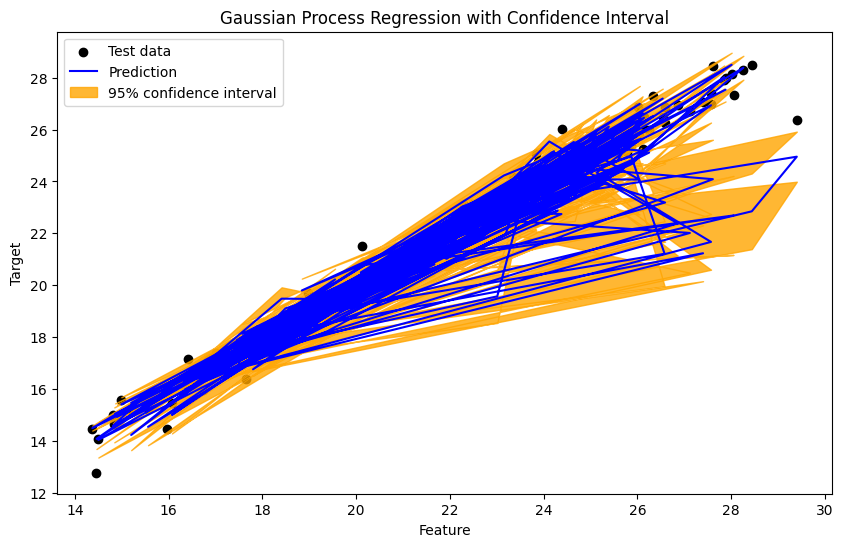

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Set up the kernel and Gaussian Process Regressor
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit the model
gp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_GB, sigma = gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse_GB = np.sqrt(mean_squared_error(y_test, y_pred_GB))
mae_GB = mean_absolute_error(y_test, y_pred_GB)
mad_GB = median_absolute_error(y_test, y_pred_GB)
mape_GB = mean_absolute_percentage_error(y_test, y_pred_GB)

# Print the evaluation metrics
print(f'RMSE: {rmse_GB:.3f}')
print(f'MAE: {mae_GB:.3f}')
print(f'MAD: {mad_GB:.3f}')
print(f'MAPE: {mape_GB:.3f}%')

# Adjusted visualization of the confidence interval for visibility
confidence_factor = 1.96 * np.maximum(sigma, 0.01)  # Ensure a minimum visibility threshold

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, c='k', label='Test data')
plt.plot(X_test[:, 0], y_pred_GB, 'b-', label='Prediction')

# Plot the confidence interval with a minimum threshold for visibility
plt.fill_between(X_test[:, 0],
                 y_pred_GB - confidence_factor,
                 y_pred_GB + confidence_factor,
                 color='orange', alpha=0.8, label="95% confidence interval")

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Gaussian Process Regression with Confidence Interval')
plt.legend(loc='upper left')
plt.show()






Random search

Random search

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the kernel with default parameters to optimize
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Setup Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel)

# Parameter distribution for Randomized Search
param_dist = {
    'kernel__k1__constant_value': uniform(0.1, 10.0),
    'kernel__k2__length_scale': uniform(0.1, 10.0),
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gp,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Fit Randomized Search
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found:", best_params)
print("Best score (neg_mean_squared_error):", best_score)

# Now let's use the best parameters to create a GaussianProcessRegressor model
optimal_kernel = C(best_params['kernel__k1__constant_value']) * RBF(best_params['kernel__k2__length_scale'])
optimal_gp = GaussianProcessRegressor(kernel=optimal_kernel, n_restarts_optimizer=9)

# Fit the model with the best kernel
optimal_gp.fit(X_train, y_train)

# Predictions
y_pred, sigma = optimal_gp.predict(X_test, return_std=True)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=3.845401188473625, kernel__k2__length_scale=9.60714306409916; total time=   1.0s
[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   2.1s
[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.5s
[CV] END kernel__k1__constant_value=7.41993941811405, kernel__k2__length_scale=6.086584841970366; total time=   1.2s
[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   1.1s
[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   1.1s
[CV] END kernel__k1__constant_value=1.6601864044243653, kernel__k2__length_scale=1.6599452033620266; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.6808361216819946, kernel__k2__length_scale=8.761761457749351; total time=   0.8s
[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.2s
[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   1.3s
[CV] END kernel__k1__constant_value=6.1111501174320875, kernel__k2__length_scale=7.180725777960454; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


[CV] END kernel__k1__constant_value=0.30584494295802445, kernel__k2__length_scale=9.799098521619943; total time=   0.9s
[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   1.1s
[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   1.1s
[CV] END kernel__k1__constant_value=8.424426408004217, kernel__k2__length_scale=2.2233911067827616; total time=   1.1s
[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.0s
[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.1s
[CV] END kernel__k1__constant_value=1.9182496720710063, kernel__k2__length_scale=1.9340450985343383; total time=   1.2s
[CV] END kernel__k1__constant_value=3.1424224295953773, kernel__k2__length_scale=5.347564316322378; total time=   1.2s
[CV] END kernel__k1__constant_value=3.142422

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   3.0s
[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.1s
[CV] END kernel__k1__constant_value=4.419450186421157, kernel__k2__length_scale=3.0122914019804194; total time=   1.1s
Best parameters found: {'kernel__k1__constant_value': 8.424426408004217, 'kernel__k2__length_scale': 2.2233911067827616}
Best score (neg_mean_squared_error): -0.6404867662668977
Test RMSE: 0.814
Test MAE: 0.605


Best Gussian

Test RMSE: 0.6383193180908022
Test MAE: 0.4550823012942074
Test MAD: 0.35307960532570704
Test MAPE: 2.0876603015784037%


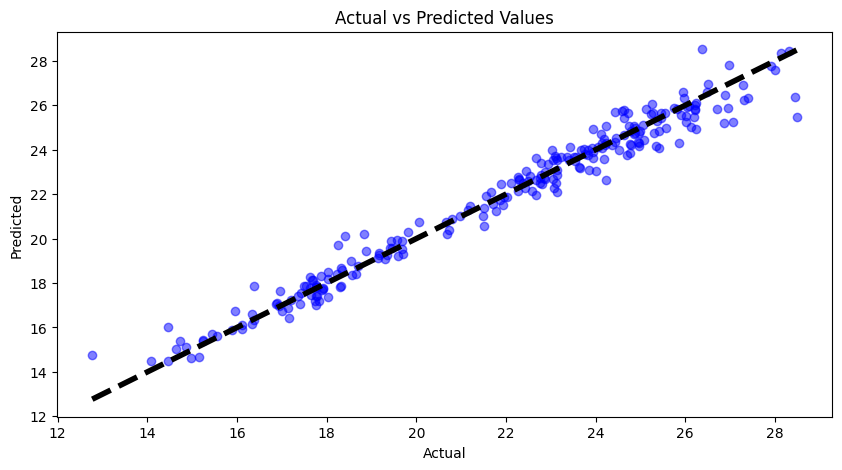

Results saved to Excel file: /content/Gaussian Process_Randomsearch_Results_DS2.xlsx


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

# Adjust the bounds for the kernel parameters
constant_value = 8.424426408004217
length_scale = 2.2233911067827616
kernel = C(constant_value, (1e-3, 1e6)) * RBF(length_scale, (1e-6, 1e3))

# Initialize Gaussian Process Regressor with the best kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# Fit the model
gp.fit(X_train, y_train.ravel())

# Make predictions
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()  # Fit and transform training data
gp.fit(X_train, y_train_scaled)  # Fit model with scaled target

y_test_pred, sigma = gp.predict(X_test, return_std=True)
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot the test data, prediction, and the 95% confidence interval
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

results_df = pd.DataFrame({
    'Actual': y_test.ravel(),
    'Predicted': y_test_pred,
    'Lower CI': y_test_pred - 1.96 * sigma,
    'Upper CI': y_test_pred + 1.96 * sigma
})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
excel_path = '/content/Gaussian Process_Randomsearch_Results_DS2.xlsx'
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")

# **Time Series**

ACF and PACF

Seasonal component: For seasonality to be present, we would expect to see regular patterns or cycles in the seasonal component of the decomposition plot. Based on the images , the seasonal component seems to be very close to zero throughout the entire series, which suggests there is no significant seasonality in your data.

ACF and PACF plots: If the data had a strong seasonal component, we would expect to see spikes at the seasonal lags in the ACF and PACF plots. For instance, if there was monthly seasonality, you might see spikes at lags 12, 24, 36, and so on. However, in the plots you shared, there are no such recurring spikes, further suggesting a lack of seasonality in your data..

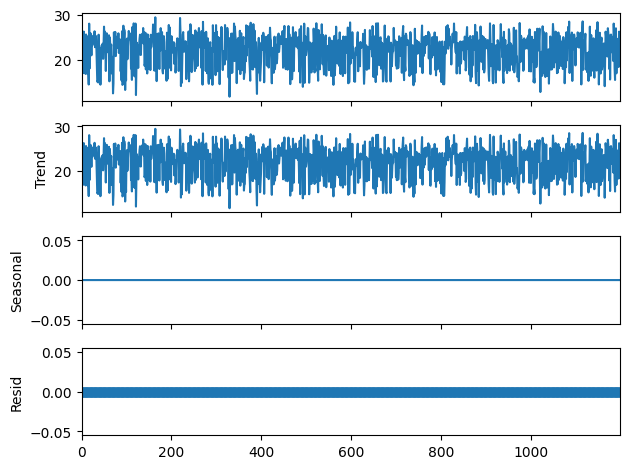

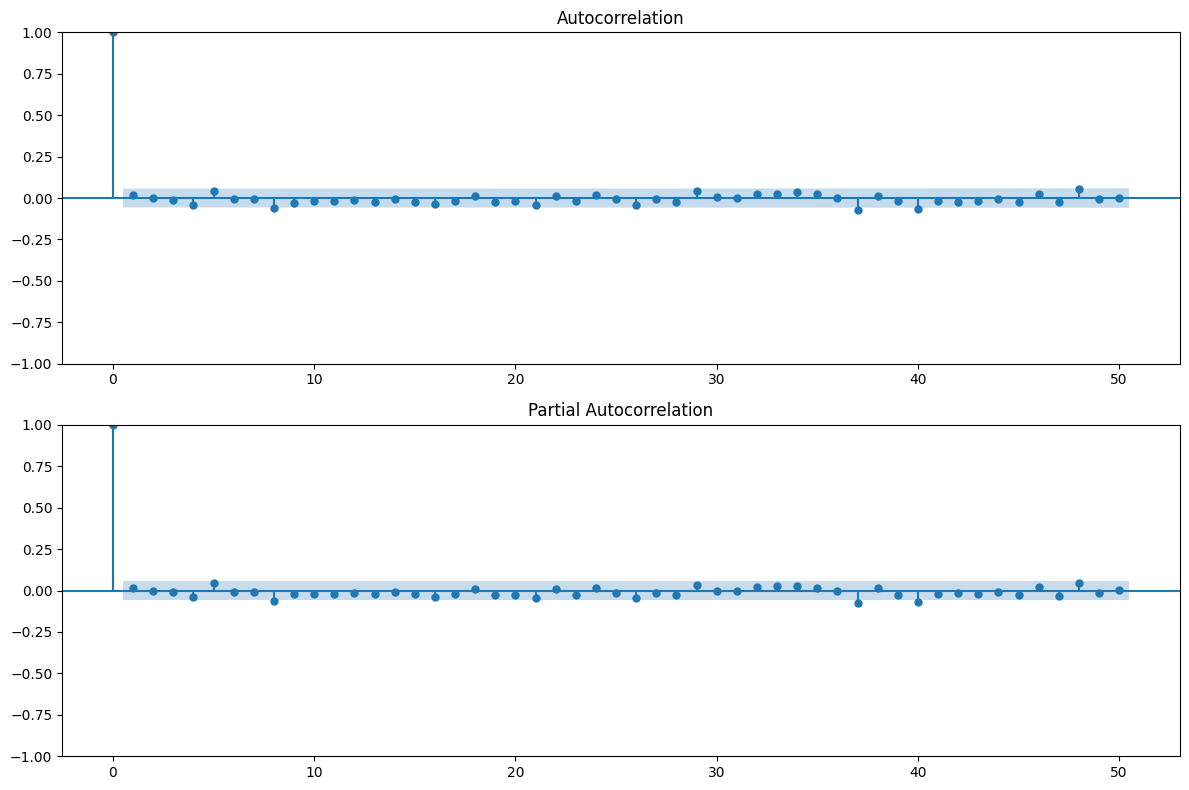

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y = np.concatenate((y_train, y_test))

# Flatten the array to make it 1-dimensional
y = y.flatten()

# Convert to pandas Series (if not already in this format)
y_series = pd.Series(y)

# Decompose the combined time series
# Note: The period should be replaced with the expected seasonality period of your data (e.g., 12 for monthly data)
decomposition_result = seasonal_decompose(y_series, model='additive', period=1)  # Modify 'period' accordingly

# Plot the decomposed components of the time series
decomposition_result.plot()
plt.show()

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF
plot_acf(y_series, ax=ax1, lags=50)  # Modify the lags if necessary

# Plot the PACF
plot_pacf(y_series, ax=ax2, lags=50)  # Modify the lags if necessary

plt.tight_layout()
plt.show()

Movin Average

univariate

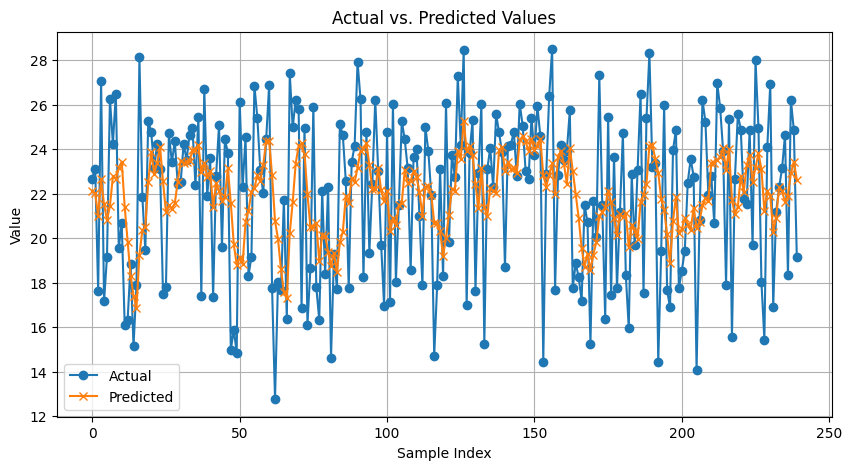

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(data, window_size):
    """Compute the moving average of the data with a specified window size."""
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(data, window, 'valid')

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""
    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]



# Let's assume y_train and y_test are defined
window_size = 5
y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calling the plot function to visualize the results
plot_predictions(y_test, y_pred_ma)

# Ensure y_train and y_test are correct
# Example: y_train = np.random.rand(100)
# Example: y_test = np.random.rand(20)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mad = np.mean(np.abs(y_true - y_pred))  # Same as MAE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE in percentage

    return rmse, mae, mad, mape

# Example usage
rmse, mae, mad, mape = calculate_metrics(y_test, y_pred_ma)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape} %")


RMSE: 3.23459327942994
MAE: 2.607675
MAD: 2.607675
MAPE: 12.826869479881617 %


Random search

Window Size 11, RMSE: 3.496
Window Size 7, RMSE: 3.346
Window Size 4, RMSE: 3.157
Window Size 8, RMSE: 3.426
Window Size 18, RMSE: 3.506
Window Size 18, RMSE: 3.506
Window Size 18, RMSE: 3.506
Window Size 10, RMSE: 3.503
Window Size 12, RMSE: 3.500
Window Size 7, RMSE: 3.346
Window Size 16, RMSE: 3.512
Window Size 2, RMSE: 2.536
Window Size 13, RMSE: 3.510
Window Size 11, RMSE: 3.496
Window Size 19, RMSE: 3.510
Window Size 5, RMSE: 3.235
Window Size 5, RMSE: 3.235
Window Size 6, RMSE: 3.262
Window Size 11, RMSE: 3.496
Window Size 15, RMSE: 3.496
Window Size 3, RMSE: 3.000
Window Size 10, RMSE: 3.503
Window Size 19, RMSE: 3.510
Window Size 6, RMSE: 3.262
Window Size 17, RMSE: 3.514
Window Size 15, RMSE: 3.496
Window Size 9, RMSE: 3.479
Window Size 14, RMSE: 3.489
Window Size 19, RMSE: 3.510
Window Size 4, RMSE: 3.157
Window Size 16, RMSE: 3.512
Window Size 3, RMSE: 3.000
Window Size 4, RMSE: 3.157
Window Size 10, RMSE: 3.503
Window Size 7, RMSE: 3.346
Window Size 9, RMSE: 3.479
Window S

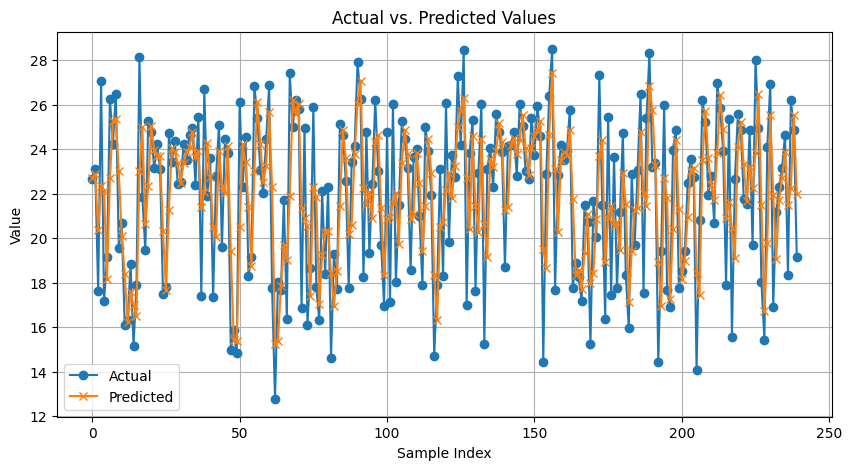

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_squared_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train."""
    # Flatten the input arrays to ensure they are one-dimensional
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)

    # Combine train and test for the moving average calculation, then just take the last len(y_test) predictions
    full_series = np.concatenate([y_train_flat, y_test_flat])
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test_flat):]


# Assuming y_train and y_test are numpy arrays
# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Predict using the randomly chosen window size
    y_pred_ma = predict_with_moving_average(y_train, y_test, window_size)

    # Ensure prediction length matches y_test length for fair comparison
    y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

    # Calculate RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))

    # Update best score and window size if the current RMSE is lower
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.3f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.3f}')

# Once the best window size is found, plot predictions with the best window size
y_pred_ma_best = predict_with_moving_average(y_train, y_test, best_window_size)
plot_predictions(y_test, y_pred_ma_best)


Best Moving Average

Best Window Size: 2
RMSE: 2.536
MAE: 2.063
MAD: 2.063
MAPE: 10.024%


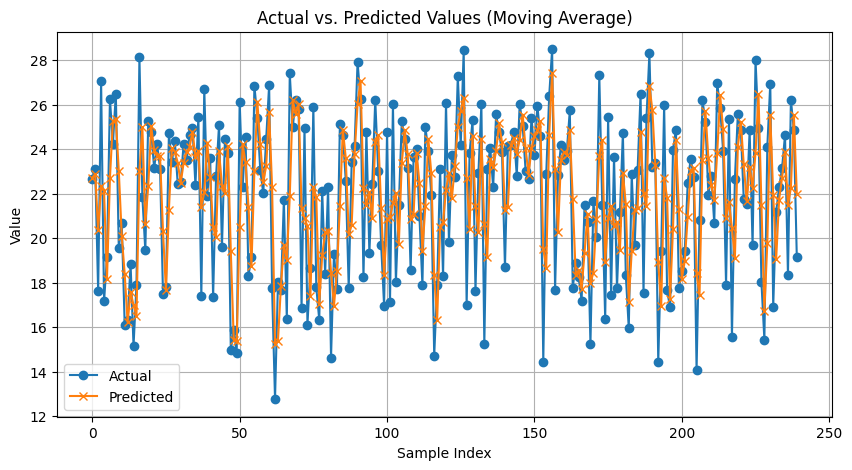

Results saved to Excel file: moving_average_uni_results_DS2.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predict_with_moving_average(y_train, y_test, window_size):
    """Use moving average to predict the values in y_test based on y_train"""

    # Flatten both y_train and y_test to ensure they are one-dimensional
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)

    # Combine train and test for the moving average calculation
    full_series = np.concatenate((y_train, y_test))
    moving_avg_predictions = moving_average(full_series, window_size)

    # Only the predictions for the test set
    return moving_avg_predictions[-len(y_test):]

# Assuming y_train and y_test are numpy arrays
best_window_size = 2  # From your random search results

# Predict using the best window size
y_pred_ma = predict_with_moving_average(y_train, y_test, best_window_size)

# Ensure prediction length matches y_test length for fair comparison
y_test_adjusted = y_test[-len(y_pred_ma):] if len(y_pred_ma) < len(y_test) else y_test

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test_adjusted, y_pred_ma))
mae = mean_absolute_error(y_test_adjusted, y_pred_ma)
mad = np.mean(np.abs(y_test_adjusted - y_pred_ma))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test_adjusted - y_pred_ma) / y_test_adjusted)) * 100  # MAPE in percentage

print(f"Best Window Size: {best_window_size}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


plt.figure(figsize=(10, 5))
plt.plot(y_test_adjusted, label='Actual', marker='o')
plt.plot(y_pred_ma, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values (Moving Average)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_uni_results_DS2.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


multivariate

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Calculate moving averages for each feature
window_size = 5
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")




RMSE: 3.38
MAE: 2.72
MAD: 2.72
MAPE: 13.46%


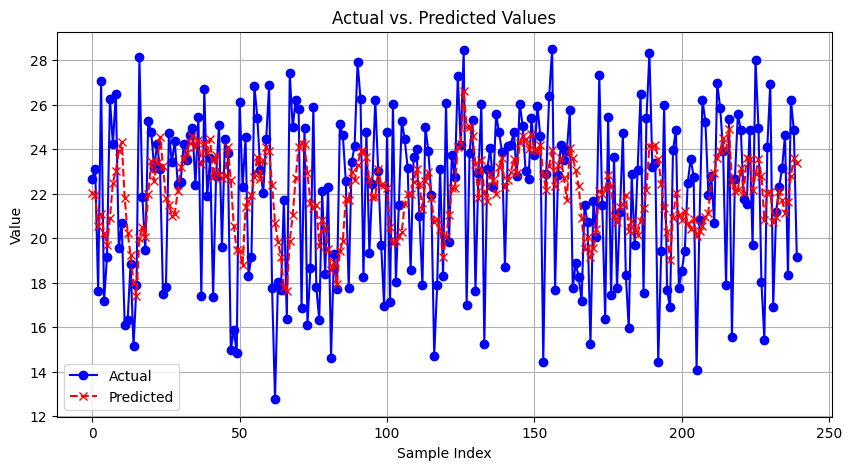

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o', linestyle='-', color='blue')
    plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='red')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assume y_test and y_pred are already defined from your model predictions
plot_predictions(y_test, y_pred)


Random search

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Define the range for the window size and number of iterations for random search
window_sizes = range(2, 21)  # Window sizes from 2 to 20
iterations = 50  # Number of iterations for random search

best_score = float('inf')
best_window_size = None

for _ in range(iterations):
    # Randomly pick a window size from the defined range
    window_size = random.choice(window_sizes)

    # Calculate moving averages for each feature using the random window size
    for feature in feature_names:
        X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=window_size, min_periods=1).mean()
        X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=window_size, min_periods=1).mean()

    # Select only the moving average columns for modeling
    X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
    X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train_MA, y_train)

    # Make predictions
    y_pred = model.predict(X_test_MA)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Update best score and window size
    if rmse < best_score:
        best_score = rmse
        best_window_size = window_size

    print(f'Window Size {window_size}, RMSE: {rmse:.2f}')

print(f'Best Window Size: {best_window_size}, Best RMSE: {best_score:.2f}')


Window Size 3, RMSE: 3.07
Window Size 9, RMSE: 3.63
Window Size 12, RMSE: 3.66
Window Size 7, RMSE: 3.49
Window Size 4, RMSE: 3.25
Window Size 6, RMSE: 3.37
Window Size 14, RMSE: 3.61
Window Size 5, RMSE: 3.38
Window Size 6, RMSE: 3.37
Window Size 16, RMSE: 3.60
Window Size 7, RMSE: 3.49
Window Size 16, RMSE: 3.60
Window Size 4, RMSE: 3.25
Window Size 20, RMSE: 3.60
Window Size 9, RMSE: 3.63
Window Size 10, RMSE: 3.65
Window Size 17, RMSE: 3.64
Window Size 7, RMSE: 3.49
Window Size 18, RMSE: 3.61
Window Size 8, RMSE: 3.55
Window Size 11, RMSE: 3.63
Window Size 18, RMSE: 3.61
Window Size 13, RMSE: 3.65
Window Size 5, RMSE: 3.38
Window Size 4, RMSE: 3.25
Window Size 10, RMSE: 3.65
Window Size 9, RMSE: 3.63
Window Size 13, RMSE: 3.65
Window Size 6, RMSE: 3.37
Window Size 6, RMSE: 3.37
Window Size 18, RMSE: 3.61
Window Size 10, RMSE: 3.65
Window Size 16, RMSE: 3.60
Window Size 19, RMSE: 3.61
Window Size 9, RMSE: 3.63
Window Size 18, RMSE: 3.61
Window Size 16, RMSE: 3.60
Window Size 14, RMS

Best MA Multi

RMSE: 3.07
MAE: 2.51
MAD: 2.51
MAPE: 12.25%


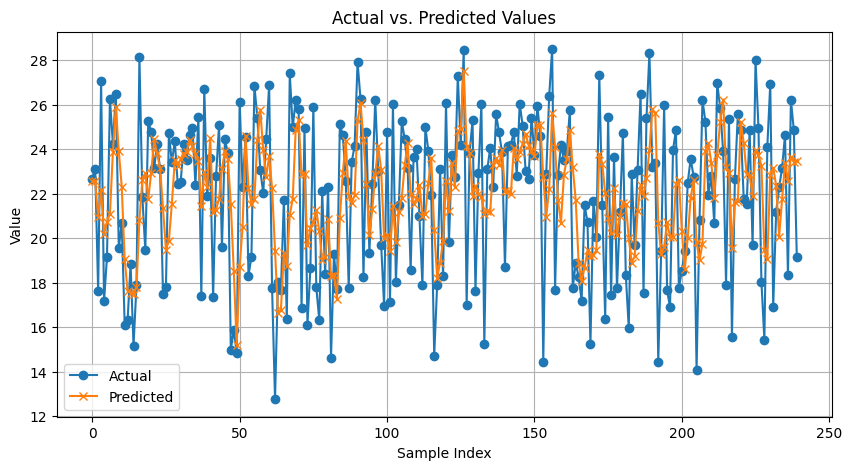

Results saved to Excel file: moving_average_Multi_results_DS2.xlsx


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

n_features = X_train.shape[1]
feature_names = [f'X{i}' for i in range(1, n_features + 1)]

# Convert arrays back to DataFrame assuming X_train and X_test are numpy arrays
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Use the best window size found from the random search
best_window_size = 3

# Calculate moving averages for each feature using the best window size
for feature in feature_names:
    X_train_df[f'{feature}_MA'] = X_train_df[feature].rolling(window=best_window_size, min_periods=1).mean()
    X_test_df[f'{feature}_MA'] = X_test_df[feature].rolling(window=best_window_size, min_periods=1).mean()

# Select only the moving average columns for modeling
X_train_MA = X_train_df[[f'{feature}_MA' for feature in feature_names]]
X_test_MA = X_test_df[[f'{feature}_MA' for feature in feature_names]]

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_MA, y_train)

# Make predictions
y_pred = model.predict(X_test_MA)

# Calculate RMSE, MAE, MAD, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame from the test results and flatten arrays for safe measure
results_df = pd.DataFrame({
    'Actual': np.ravel(y_test),
    'Predicted_MA': np.ravel(y_pred_ma)
})

# Specify a path for the Excel file
excel_path = 'moving_average_Multi_results_DS2.xlsx'

# Save the DataFrame to an Excel file
results_df.to_excel(excel_path, index=False)

print(f"Results saved to Excel file: {excel_path}")


# **Arima**

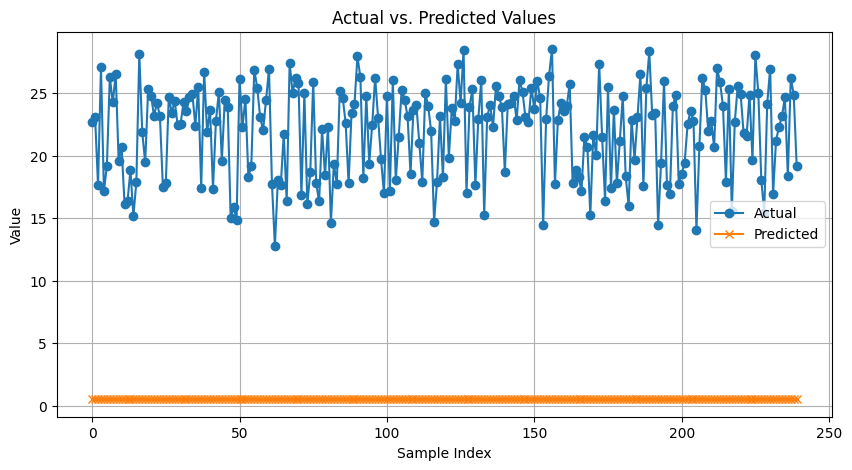

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming y_train and y_test are defined and are numpy arrays
# You might need to adjust these data as pandas Series if needed

# Fit an ARIMA model
# p (periods to lag for autoregressive model), d (degree of differencing), q (size of moving average window)
p, d, q = 5, 1, 0  # These are example parameters that you might need to tune for your dataset
model = ARIMA(y_train, order=(p, d, q))
fitted_model = model.fit()

# Predict
# Start and end indices to predict in the test set
start_index = len(y_train)
end_index = start_index + len(y_test) - 1
y_pred_arima = fitted_model.predict(start=start_index, end=end_index, dynamic=True)

# Function to plot actual vs predicted values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot predictions
plot_predictions(y_test, y_pred_arima)


In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_arima))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_arima)
print(f'MAE: {mae}')

# Calculate MAD
mad = np.mean(np.abs(y_pred_arima - y_test))
print(f'MAD: {mad}')

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_arima)
print(f'MAPE: {mape}')


RMSE: 21.670786203163143
MAE: 21.36451079056566
MAD: 21.36451079056566
MAPE: 97.34126804427945


Random search

ARIMA(5, 0, 1) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 5) RMSE=3.638
ARIMA(4, 0, 0) RMSE=3.632


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 2, 4) RMSE=3.640
ARIMA(3, 2, 2) RMSE=3.778
ARIMA(0, 2, 2) RMSE=3.639


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 2) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) RMSE=3.619
ARIMA(4, 2, 0) RMSE=5.858
ARIMA(1, 1, 3) RMSE=3.631
ARIMA(2, 0, 2) RMSE=3.632
ARIMA(5, 0, 2) RMSE=3.632


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 2, 4) RMSE=3.634


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) RMSE=3.640
ARIMA(1, 2, 1) RMSE=3.826


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 5) RMSE=3.646
ARIMA(5, 1, 0) RMSE=3.638
ARIMA(1, 0, 0) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 5) RMSE=3.634
ARIMA(5, 1, 3) RMSE=3.612
ARIMA(5, 0, 1) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) RMSE=3.633
ARIMA(3, 0, 1) RMSE=3.633
ARIMA(1, 1, 2) RMSE=3.631
ARIMA(3, 1, 1) RMSE=3.630
ARIMA(2, 0, 5) RMSE=3.635
ARIMA(5, 0, 2) RMSE=3.632


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 3) RMSE=3.640


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) RMSE=3.618
ARIMA(1, 2, 5) RMSE=3.638
ARIMA(0, 1, 4) RMSE=3.630
ARIMA(0, 1, 4) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) RMSE=3.632
ARIMA(2, 1, 2) RMSE=3.631
ARIMA(3, 0, 1) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 5) RMSE=3.633
ARIMA(2, 2, 1) RMSE=3.779
ARIMA(0, 1, 0) RMSE=3.722


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) RMSE=3.618
ARIMA(0, 0, 1) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) RMSE=3.634
ARIMA(3, 0, 0) RMSE=3.630
ARIMA(1, 1, 1) RMSE=3.630
ARIMA(1, 0, 0) RMSE=3.630
ARIMA(1, 1, 3) RMSE=3.631
ARIMA(5, 1, 1) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) RMSE=3.640
ARIMA(2, 0, 4) RMSE=3.633
ARIMA(2, 0, 2) RMSE=3.632
ARIMA(0, 0, 3) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 2) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 5) RMSE=3.638
ARIMA(0, 2, 3) RMSE=3.638


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 3) RMSE=3.640


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 1, 2) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 5) RMSE=3.642
ARIMA(5, 2, 0) RMSE=13.670
ARIMA(2, 2, 1) RMSE=3.779


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 2, 4) RMSE=3.640
ARIMA(5, 0, 0) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 2, 1) RMSE=3.656
ARIMA(0, 2, 0) RMSE=538.577
ARIMA(2, 2, 1) RMSE=3.779
ARIMA(4, 2, 0) RMSE=5.858
ARIMA(0, 1, 1) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 2, 5) RMSE=3.638


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 4) RMSE=3.640
ARIMA(0, 0, 0) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 4) RMSE=3.637


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) RMSE=3.638
ARIMA(5, 0, 1) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 1, 4) RMSE=3.639
ARIMA(1, 1, 0) RMSE=3.660


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) RMSE=3.632
ARIMA(0, 1, 2) RMSE=3.630
ARIMA(0, 0, 2) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 3) RMSE=3.638
ARIMA(3, 0, 0) RMSE=3.630
ARIMA(0, 1, 5) RMSE=3.632


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 5) RMSE=3.638


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 4) RMSE=3.634


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 3) RMSE=3.612
ARIMA(1, 0, 0) RMSE=3.630
ARIMA(4, 1, 1) RMSE=3.632
ARIMA(4, 2, 1) RMSE=3.649
ARIMA(2, 2, 0) RMSE=23.692
ARIMA(5, 0, 0) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 3) RMSE=3.619
ARIMA(3, 1, 1) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) RMSE=3.630


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 4) RMSE=3.637


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) RMSE=3.632
ARIMA(5, 0, 0) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 2, 3) RMSE=3.638
ARIMA(0, 1, 1) RMSE=3.630
ARIMA(3, 2, 0) RMSE=51.769
ARIMA(0, 2, 0) RMSE=538.577
ARIMA(3, 0, 1) RMSE=3.633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 1, 5) RMSE=3.634
Best ARIMA(4, 1, 3) RMSE=3.612


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


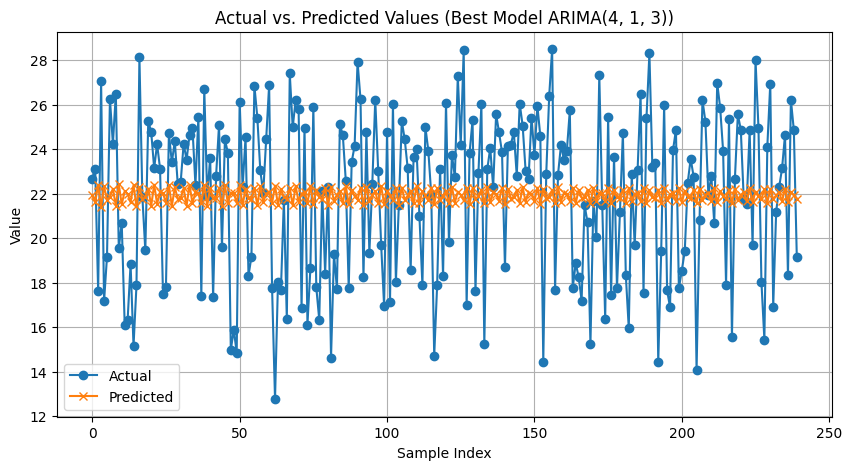

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random

# Assuming y_train and y_test are numpy arrays or pandas Series

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # Define how many iterations you'd like to perform

best_score, best_order = float("inf"), None

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)
    try:
        model = ARIMA(y_train, order=order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)
        error = mean_squared_error(y_test, predictions, squared=False)
        if error < best_score:
            best_score, best_order = error, order
        print(f'ARIMA{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'ARIMA{order} encountered an error: {e}')
        continue

print(f'Best ARIMA{best_order} RMSE={best_score:.3f}')

# Fit the best ARIMA model found via random search
best_model = ARIMA(y_train, order=best_order)
best_model_fit = best_model.fit()
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best Model ARIMA{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best Model ARIMA(4,1,3)
RMSE: 21.659
MAE: 21.353
MAD: 21.353
MAPE: 97.290%


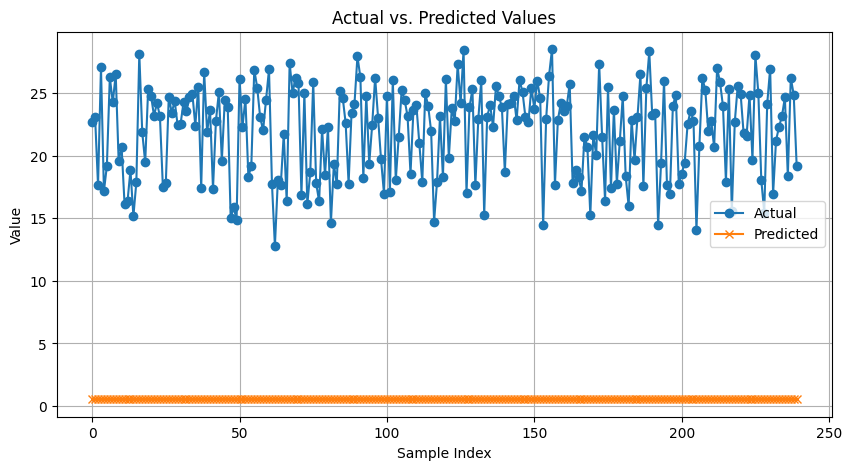

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are defined as numpy arrays or pandas Series

# Best model parameters from the grid search
best_p, best_d, best_q = 4, 1, 3

# Fit the best ARIMA model
best_model = ARIMA(y_train, order=(best_p, best_d, best_q))
best_model_fit = best_model.fit()

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1)

# Calculate various error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
mad = np.mean(np.abs(y_test - y_pred_best))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100  # MAPE

print(f'Best Model ARIMA({best_p},{best_d},{best_q})')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAD: {mad:.3f}')
print(f'MAPE: {mape:.3f}%')


plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# # Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
results_df.to_excel('Arima_Uni_Results_DS2.xlsx', index=False)


Arima Multivariate

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X_train, X_test, y_train, y_test are predefined and are numpy arrays
# The feature_names list is assumed to be already defined as you've indicated

# Best SARIMAX model parameters found from the search (update these values accordingly)
best_p, best_d, best_q = 4, 2, 5

# Fit the best SARIMAX model with the exogenous variables
best_sarimax_model = SARIMAX(y_train, order=(best_p, best_d, best_q), exog=X_train)
best_sarimax_model_fit = best_sarimax_model.fit(disp=False)

# Make predictions including the exogenous variables
y_pred_sarimax = best_sarimax_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, typ='levels')

# Calculate RMSE, MAE, MAD, and MAPE
rmse_sarimax = np.sqrt(mean_squared_error(y_test, y_pred_sarimax))
mae_sarimax = mean_absolute_error(y_test, y_pred_sarimax)
mad_sarimax = np.mean(np.abs(y_test - y_pred_sarimax))  # Mean Absolute Deviation
mape_sarimax = np.mean(np.abs((y_test - y_pred_sarimax) / y_test)) * 100  # MAPE in percentage

print(f"SARIMAX({best_p},{best_d},{best_q}) RMSE: {rmse_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAE: {mae_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAD: {mad_sarimax:.2f}")
print(f"SARIMAX({best_p},{best_d},{best_q}) MAPE: {mape_sarimax:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(4,2,5) RMSE: 0.53
SARIMAX(4,2,5) MAE: 0.39
SARIMAX(4,2,5) MAD: 0.39
SARIMAX(4,2,5) MAPE: 1.82%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


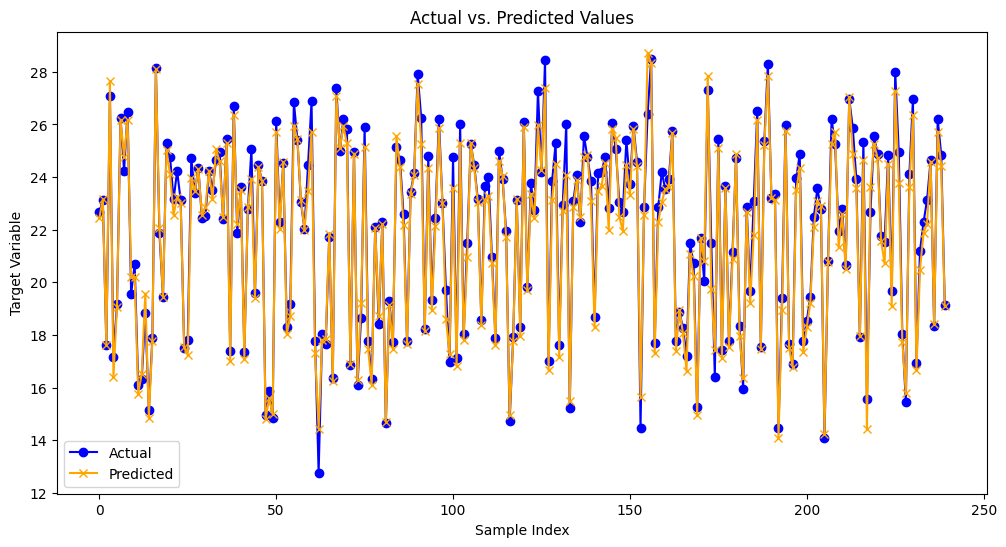

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(y_pred_sarimax, label='Predicted', color='orange', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

Random search

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 5) RMSE=0.476
Random Search SARIMAX(2, 2, 3) RMSE=0.483


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 1) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 3) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 2) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 2) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 3) RMSE=0.474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 1) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 0) RMSE=3.112


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 2) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 4) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 1) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 4) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 4) RMSE=0.477


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 2) RMSE=0.474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 5) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 1) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 3) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 2) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 4) RMSE=0.484


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 0) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 5) RMSE=0.486


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 1) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 3) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 0) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 1) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 5) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 1) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 3) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 0) RMSE=0.481


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 1) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 3) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 3) RMSE=0.474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 4) RMSE=0.484


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 2) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 5) RMSE=0.477


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 2) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 2) RMSE=0.480


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 2, 2) RMSE=0.501


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 2) RMSE=0.474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 0) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 4) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 0) RMSE=0.501


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 3) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 4) RMSE=0.477


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 2) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 4) RMSE=0.477


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 0, 3) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 0) RMSE=4.990


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 2) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 2) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 3) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 1) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=0.504


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 1, 2) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 5) RMSE=0.486
Random Search SARIMAX(1, 0, 1) RMSE=0.475
Random Search SARIMAX(0, 2, 0) RMSE=30.254


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(1, 2, 5) RMSE=0.486
Random Search SARIMAX(0, 0, 1) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 5) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 3) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 3) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 3) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 0) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=0.504


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 1, 3) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 2, 2) RMSE=0.476
Random Search SARIMAX(0, 0, 0) RMSE=0.475


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 0) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 0, 1) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 2) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 2, 2) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 1) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 1, 5) RMSE=0.478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 3) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 1, 5) RMSE=0.477


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 0, 4) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 0, 5) RMSE=0.476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(5, 0, 2) RMSE=0.482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(3, 2, 1) RMSE=0.474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(2, 1, 2) RMSE=0.479


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(0, 2, 1) RMSE=0.504


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Random Search SARIMAX(4, 1, 4) RMSE=0.478
Best SARIMAX(3, 2, 1) RMSE=0.474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


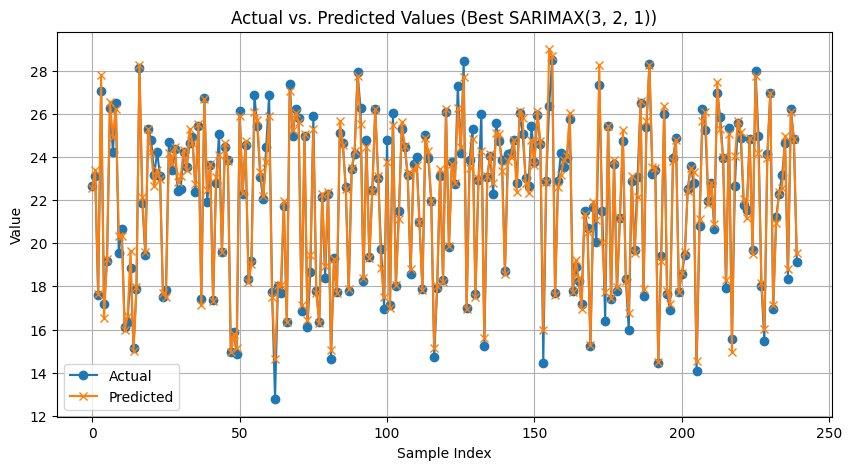

In [ ]:
import numpy as np
import pandas as pd
import random
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are predefined numpy arrays
# Assuming feature_names is a list with your feature names

# Define the ranges for p, d, and q
p_range = range(0, 6)
d_range = range(0, 3)
q_range = range(0, 6)

# Set the number of iterations for random search
iterations = 100  # or any other number of iterations you want

best_score, best_order = float("inf"), None
best_params = {}

# Perform the random search
for i in range(iterations):
    p = random.choice(p_range)
    d = random.choice(d_range)
    q = random.choice(q_range)
    order = (p, d, q)

    try:
        # Fit the SARIMAX model (include exogenous variables if available)
        model = SARIMAX(y_train, exog=X_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # Predict (include exogenous variables if available)
        y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

        # Calculate the error
        error = mean_squared_error(y_test, y_pred, squared=False)

        # Compare and store the best score
        if error < best_score:
            best_score, best_order = error, order
            best_params = {'p': p, 'd': d, 'q': q}

        print(f'Random Search SARIMAX{order} RMSE={error:.3f}')
    except Exception as e:
        print(f'Error with SARIMAX{order}: {e}')
        continue

print(f'Best SARIMAX{best_order} RMSE={best_score:.3f}')

# Fit the best SARIMAX model found via random search
best_model = SARIMAX(y_train, exog=X_train, order=best_order, enforce_stationarity=False, enforce_invertibility=False)
best_model_fit = best_model.fit(disp=False)

# Predict using the best model
y_pred_best = best_model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Plot the predictions of the best model
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title(f'Actual vs. Predicted Values (Best SARIMAX{best_order})')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Best Arima for multivariate

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 0.474
MAE: 0.321
MAD: 0.321
MAPE: 1.502%


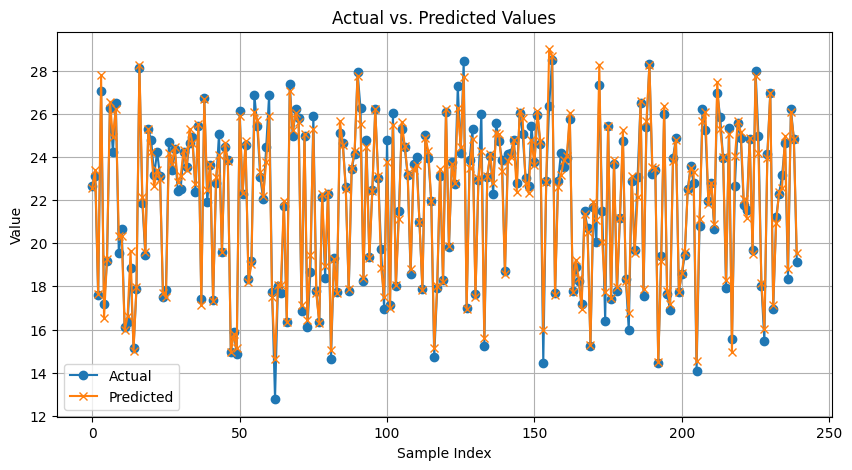

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_train and y_test are numpy arrays or pandas Series
# Assuming X_train and X_test are numpy arrays or pandas DataFrames corresponding to exogenous variables

# Best model parameters identified (p=5, d=0, q=2)
p, d, q = 3, 2, 1

# Fit the SARIMAX model using the best parameters
model = SARIMAX(y_train, order=(p, d, q), exog=X_train, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions using the fitted model
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Calculate error metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = np.mean(np.abs(y_test - y_pred))  # Mean Absolute Deviation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE in percentage

# Print the error metrics
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"MAD: {mad:.3f}")
print(f"MAPE: {mape:.3f}%")


# Plot y_test against y_pred
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Save results to Excel
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Arima_Multi_results_DS2.xlsx', index=False)

# **Stacking**

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

RMSE: 0.470293436371795
MAE: 0.32280383443228544
MAD: 0.2127560322148252
R-squared: 0.9832187914369067


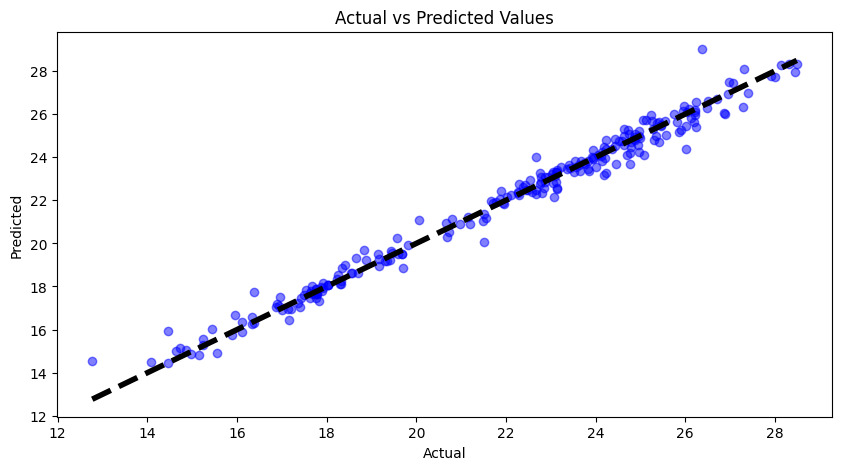

Results saved to Excel file 'Stacking_Results_ST_DS2.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Define custom regressor for SARIMAX using optimized parameters
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(3, 2, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Define custom regressor for Polynomial Regression using PCA
class CustomPolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1, n_components=12):
        self.degree = degree
        self.n_components = n_components

    def fit(self, X, y):
        self.model = make_pipeline(PolynomialFeatures(degree=self.degree), LinearRegression())
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create Gaussian Process Model using optimized parameters
kernel = C(8.424426408004217, (1e-2, 1e2)) * RBF(2.2233911067827616, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models with optimized parameters
sarimax_model = CustomSARIMAX(order=(3, 2, 1))
poly_model = CustomPolynomialRegression(degree=1, n_components=12)
lr_model = LinearRegression()

# Define the stacking ensemble with all optimized models
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming X_train, X_test, y_train, y_test are defined
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()



# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_DS2.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results_ST_DS2.xlsx'.")



with PCA

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

RMSE: 0.46771733978128677
MAE: 0.32083680621909366
MAD: 0.2104434614951085
R-squared: 0.9834021306531219


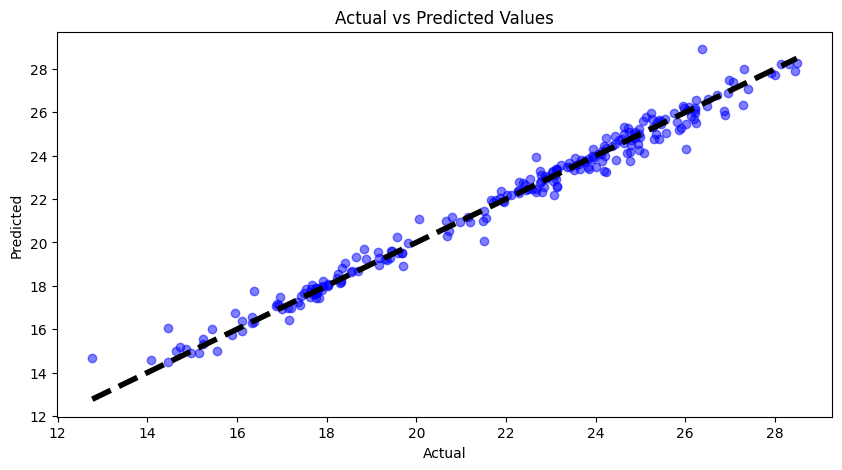

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin

# Custom SARIMAX model as before
class CustomSARIMAX(BaseEstimator, RegressorMixin):
    def __init__(self, order=(4, 1, 1), seasonal_order=(0, 0, 0, 0), exog=None):
        self.order = order
        self.seasonal_order = seasonal_order
        self.exog = exog

    def fit(self, X, y):
        self.model_ = SARIMAX(y, order=self.order, seasonal_order=self.seasonal_order, exog=X, enforce_stationarity=False, enforce_invertibility=False)
        self.model_fit_ = self.model_.fit(disp=False)
        return self

    def predict(self, X):
        return self.model_fit_.forecast(steps=len(X), exog=X)

# Custom Polynomial Regression with PCA
class CustomPCA_PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1, n_components=12):
        self.degree = degree
        self.n_components = n_components

    def fit(self, X, y):
        self.model = Pipeline([
            ('pca', PCA(n_components=self.n_components)),
            ('poly', PolynomialFeatures(degree=self.degree)),
            ('linear', LinearRegression())
        ])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Gaussian Process Model with optimized kernel parameters
kernel = C(8.424426408004217, (1e-2, 1e2)) * RBF(2.2233911067827616, (1e-2, 1e2))
gp_model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Initialize models with optimized parameters
sarimax_model = CustomSARIMAX(order=(4, 1, 1))
poly_model = CustomPCA_PolynomialRegression(degree=1, n_components=12)
lr_model = LinearRegression()

# Stacking Ensemble with optimized models
stacked_model = StackingRegressor(
    estimators=[
        ('gp', gp_model),
        ('poly', poly_model),
        ('sarimax', sarimax_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)

# Assuming you have defined X_train, X_test, y_train, y_test appropriately
# Fit the model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print('MAE:', mae)
print('MAD:', mad)
print('R-squared:', r2)



plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ST_with PCA_DS2.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results_ST_with PCA_DS2.xlsx'.")


### ***Machine Learning model ***

# **KNN**

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = (y_true != 0)
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


n_neighbors = [3, 5, 7, 9, 11, 13, 15, 17]
scores = {}

for n_neighbor in n_neighbors:
    # Initialize and train regressor
    knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbor)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mae = mean_absolute_error(y_test, y_pred_knn)
    mad = median_absolute_error(y_test, y_pred_knn)
    mape = mean_absolute_percentage_error(y_test, y_pred_knn)

    # Store results in dictionary
    scores[n_neighbor] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for k, v in scores.items():
    print(f"Number of Neighbors: {k}")
    for score_name, score_value in v.items():
        print(f"{score_name}: {score_value:.2f}")
    print("")  # Newline for better readability


Number of Neighbors: 3
RMSE: 0.51
MAE: 0.35
MAD: 0.25
MAPE: 1.66

Number of Neighbors: 5
RMSE: 0.58
MAE: 0.40
MAD: 0.29
MAPE: 1.86

Number of Neighbors: 7
RMSE: 0.62
MAE: 0.42
MAD: 0.28
MAPE: 1.97

Number of Neighbors: 9
RMSE: 0.66
MAE: 0.45
MAD: 0.34
MAPE: 2.12

Number of Neighbors: 11
RMSE: 0.69
MAE: 0.47
MAD: 0.34
MAPE: 2.22

Number of Neighbors: 13
RMSE: 0.70
MAE: 0.49
MAD: 0.38
MAPE: 2.32

Number of Neighbors: 15
RMSE: 0.72
MAE: 0.51
MAD: 0.37
MAPE: 2.39

Number of Neighbors: 17
RMSE: 0.74
MAE: 0.52
MAD: 0.39
MAPE: 2.46



Random search

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import matplotlib.pyplot as plt
import pandas as pd

# Define a function for MAPE as it's not available in sklearn
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter range for RandomizedSearchCV
param_distributions = {
    'n_neighbors': randint(1, 31),  # Let's say we're testing n_neighbors between 1 and 30
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Create a KNN regressor object
knn = KNeighborsRegressor()

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn,
    param_distributions=param_distributions,
    n_iter=20,  # Adjust based on how many iterations you want to perform
    scoring='neg_mean_squared_error',  # Negative MSE for optimization
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train)

# Best model found by random search
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}


Best KNN

RMSE: 0.4556774617139208
MAE: 0.30462890362665185
MAD: 0.21215265104223313
MAPE: None%


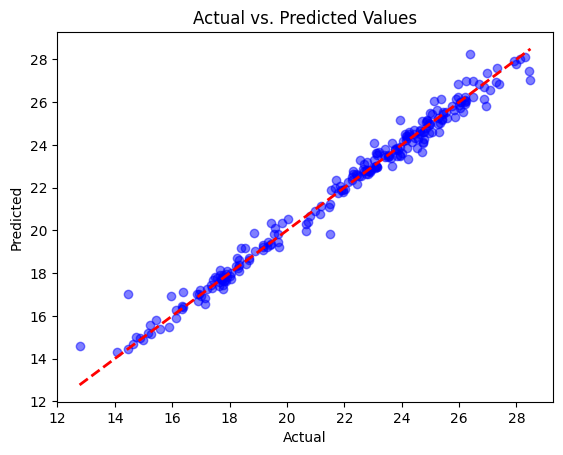

Results have been saved to Excel file 'KNN_Results_DS2.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    # Ensure the inputs are arrays to prevent unexpected 'scalar' behavior
    y_true, y_pred = np.array(y_true, ndmin=1), np.array(y_pred, ndmin=1)

    # Check if any of the arrays is unexpectedly scalar or zero-dimensional
    if y_true.ndim == 0 or y_pred.ndim == 0:
        raise ValueError("Input arrays should be one-dimensional or higher.")

    # Avoid division by zero
    mask = y_true != 0
    if not np.any(mask):  # If all values are zero, return NaN to avoid invalid calculations
        return np.nan




# Create KNN regressor with the best parameters
knn = KNeighborsRegressor(n_neighbors=2, p=2, weights='distance')

# Fit KNN model
knn.fit(X_train_scaled, y_train)

# Predict on the validation set
y_test_pred = knn.predict(X_test_scaled)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")

# Plot actual vs. predicted values
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('KNN_Results_DS2.xlsx', index=False)

print("Results have been saved to Excel file 'KNN_Results_DS2.xlsx'.")


# **Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Parameters for Decision Tree
max_depths = [3, 5, 7, 9, 11, 13, 15, 17]  # Example max_depths, typically used to prevent overfitting
scores = {}

for max_depth in max_depths:
    # Initialize and train regressor
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred_dt = dt.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    mae = mean_absolute_error(y_test, y_pred_dt)
    mad = median_absolute_error(y_test, y_pred_dt)
    mape = mean_absolute_percentage_error(y_test, y_pred_dt)

    # Store results in dictionary
    scores[max_depth] = {'RMSE': rmse, 'MAE': mae, 'MAD': mad, 'MAPE': mape}

# Display scores
for depth, vals in scores.items():
    print(f"Max Depth: {depth}")
    for metric_name, metric_value in vals.items():
        print(f"{metric_name}: {metric_value:.2f}")
    print("")  # Newline for better readability


Max Depth: 3
RMSE: 0.70
MAE: 0.55
MAD: 0.46
MAPE: 2.57

Max Depth: 5
RMSE: 0.50
MAE: 0.36
MAD: 0.27
MAPE: 1.67

Max Depth: 7
RMSE: 0.54
MAE: 0.39
MAD: 0.26
MAPE: 1.79

Max Depth: 9
RMSE: 0.58
MAE: 0.41
MAD: 0.30
MAPE: 1.92

Max Depth: 11
RMSE: 0.63
MAE: 0.45
MAD: 0.32
MAPE: 2.10

Max Depth: 13
RMSE: 0.64
MAE: 0.45
MAD: 0.30
MAPE: 2.10

Max Depth: 15
RMSE: 0.64
MAE: 0.46
MAD: 0.33
MAPE: 2.13

Max Depth: 17
RMSE: 0.59
MAE: 0.44
MAD: 0.34
MAPE: 2.05



Random Search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define the parameter distributions to sample from
param_dist = {
    'max_depth': randint(3, 20),  # Depths from 3 to 20
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 20)   # Minimum number of samples required at each leaf node
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    random_state=42,
    verbose=1
)

# Execute the random search
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae = mean_absolute_error(y_test, y_pred_test)
mad = median_absolute_error(y_test, y_pred_test)
mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAD: {mad}")
print(f"MAPE: {mape}%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 6}
RMSE: 0.491258452585399
MAE: 0.3481751584176616
MAD: 0.24678571428571416
MAPE: 1.6096546048691558%


Best Decision tree

Test RMSE: 0.49071547365816
Test MAE: 0.34671045934358774
Test MAD: 0.24626984126983942
Test MAPE: 1.6036956989534772%


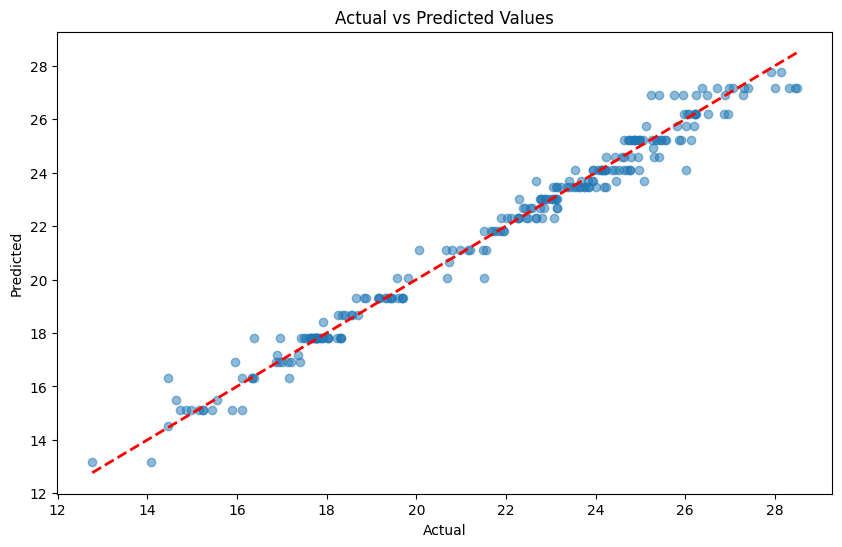

Results have been saved to Excel file 'DecisionTree_Results_DS2.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create the Decision Tree Regressor with specified best parameters
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=6)

# Assuming X_train, y_train, X_test, y_test are already defined
# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Predict on the test data
y_test_pred = dt_regressor.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('DecisionTree_Results_DS2.xlsx', index=False)

print("Results have been saved to Excel file 'DecisionTree_Results_DS2.xlsx'.")


# **SVR**

Test RMSE: 0.5024957585282951
Test MAE: 0.3620762756200721
Test MAD: 0.2602171657856278
Test MAPE: 1.71874374917288%


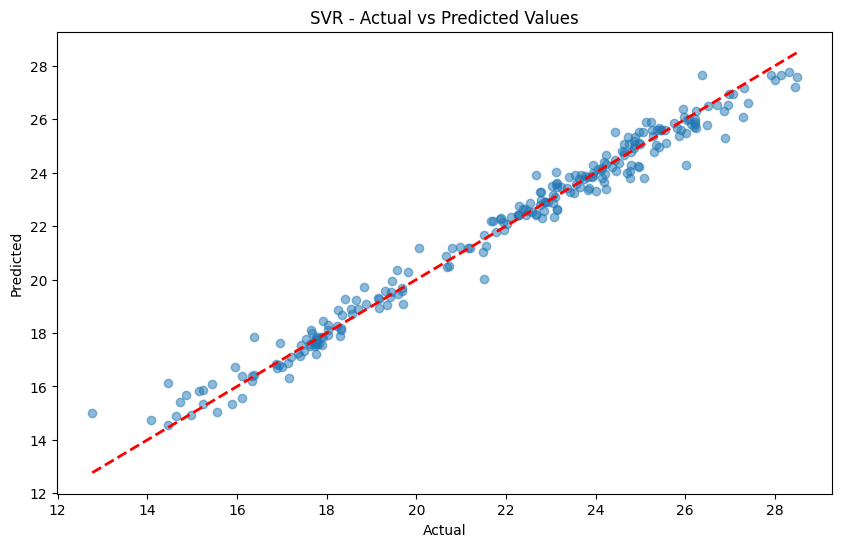

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming X_train, y_train, X_test, y_test are already defined and split
# Standardizing data - very important for SVR
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define and configure the SVR model
# Note: Hyperparameters should be chosen based on a previous analysis such as using GridSearchCV or RandomizedSearchCV
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Example parameters

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()






Random search

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=0.31489116479568624, epsilon=0.07114476009343425, gamma=0.015702970884055395; total time=   0.0s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, gamma=0.00029375384576328325; total time=   0.1s
[CV] END C=2.481040974867813, epsilon=0.00029380279387035364, ga

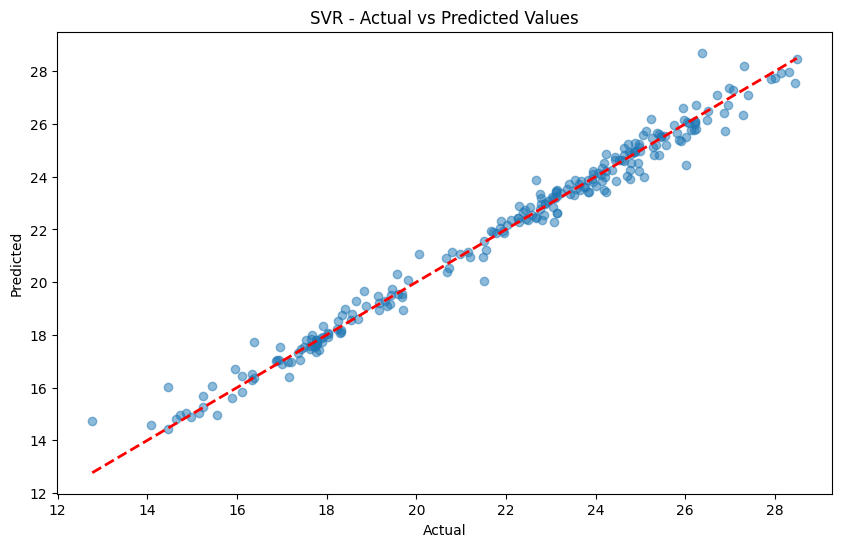

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Define the parameter distributions to sample from
param_dist = {
    'C': loguniform(1e-2, 1e2),  # Regularization parameter
    'gamma': loguniform(1e-4, 1e-1),  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'epsilon': loguniform(1e-4, 1e-1)  # Epsilon in the epsilon-SVR model
}

# Create the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=SVR(kernel='rbf'),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    verbose=2,
    random_state=42
)

# Execute the random search
random_search.fit(X_train_scaled, y_train_scaled)

# Best model found by random search
best_model = random_search.best_estimator_

# Make predictions using the best model on the test set
y_test_pred_scaled = best_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print("Best parameters found:", random_search.best_params_)
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()



Best SVR

Test RMSE: 0.456792060628563
Test MAE: 0.31631103032598984
Test MAD: 0.2166347556414614
Test MAPE: 1.4842789755677874%


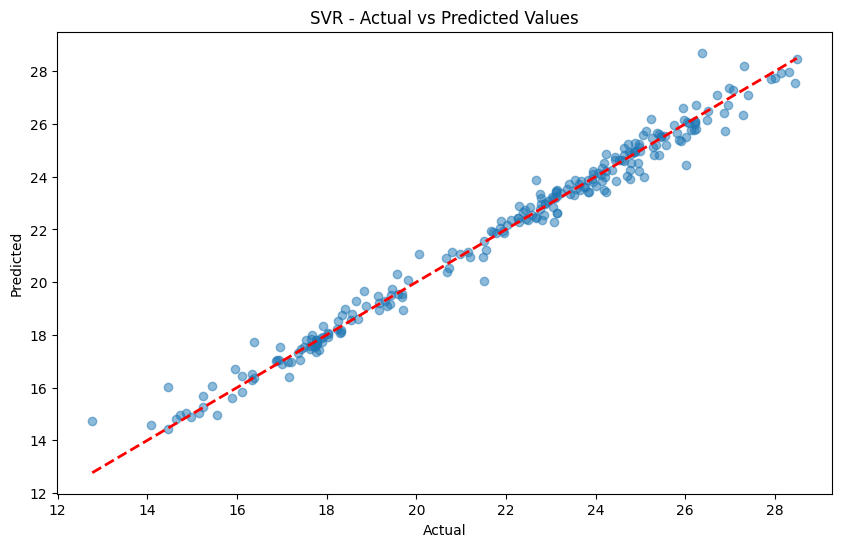

Results have been saved to Excel file 'SVR_Results_DS2.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, make_scorer
from scipy.stats import loguniform, randint
import matplotlib.pyplot as plt

# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_index = y_true != 0
    y_true = y_true[non_zero_index]
    y_pred = y_pred[non_zero_index]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Standardize the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

svr_model = SVR(C=88.62326508576255, epsilon=0.020736445177905044, gamma=0.00039459088111000007)

# Fit the model on the training data
svr_model.fit(X_train_scaled, y_train_scaled)

# Predict on the test data
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae = mean_absolute_error(y_test, y_test_pred)
mad = median_absolute_error(y_test, y_test_pred)
mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MAD: {mad}")
print(f"Test MAPE: {mape}%")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR - Actual vs Predicted Values')
plt.show()

# Save the actual and predicted values to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results_df.to_excel('SVR_Results_DS2.xlsx', index=False)

print("Results have been saved to Excel file 'SVR_Results_DS2.xlsx'.")

# **Stacking**

RMSE: 0.4225
MAE: 0.2931
MAD: 0.2221
MAPE: -1.3688%


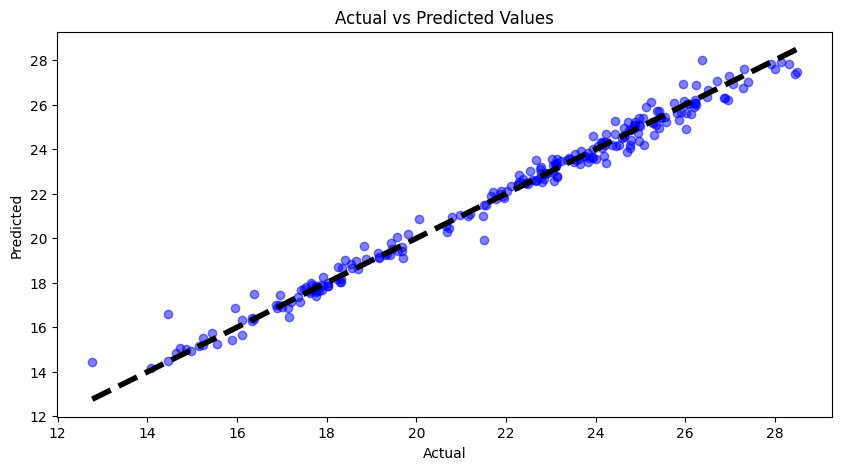

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

# Define a custom class for MAPE
class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        pass  # Dummy implementation

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps  # Avoid division by zero
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape  # Return negative for consistency

# Decision Tree with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=6)

# KNN with optimized parameters
knn = KNeighborsRegressor(n_neighbors=2, p=2, weights='distance')

# SVR with optimized parameters
svr = make_pipeline(StandardScaler(), SVR(C=88.62326508576255, epsilon=0.020736445177905044, gamma=0.00039459088111000007))

# Stacking Ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

# Fit the stacking ensemble
stacked_model.fit(X_train, y_train)

# Predictions
y_pred = stacked_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)  # Using the custom MAPE scorer

# Output the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_DS2.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results_ML_DS2.xlsx'.")


with PCA

RMSE: 0.4137
MAE: 0.2824
MAD: 0.2067
MAPE: -1.3394%


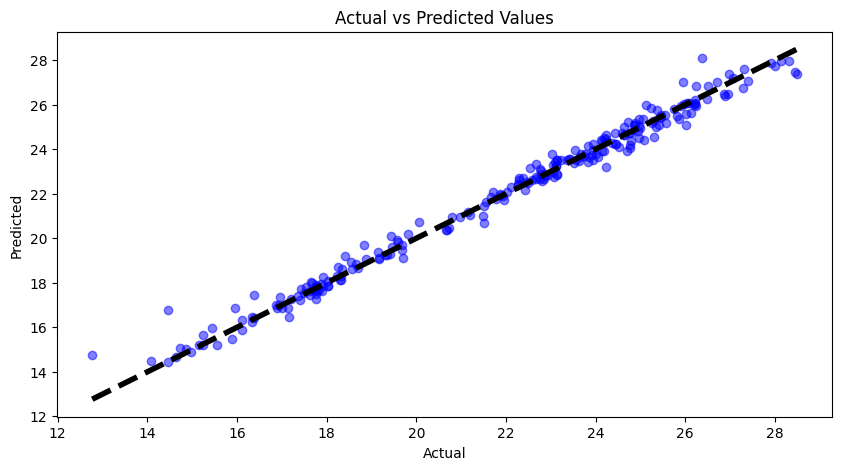

Results saved to Excel file 'Stacking_Results.xlsx'.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Corrected import
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

class MAPE(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        return self

    def predict(self, X):
        pass  # Dummy, not used

    def score(self, y_true, y_pred):
        epsilon = np.finfo(np.float64).eps
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
        return -mape

n_components = 12  # Optimal number of PCA components based on your data

decision_tree = make_pipeline(PCA(n_components=n_components),
                              DecisionTreeRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=6))

knn = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    KNeighborsRegressor(n_neighbors=2, p=2, weights='distance'))

svr = make_pipeline(StandardScaler(), PCA(n_components=n_components),
                    SVR(C=88.62326508576255, epsilon=0.020736445177905044, gamma=0.00039459088111000007))

stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mad = median_absolute_error(y_test, y_pred)
mape = MAPE().score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Save the results to an Excel file
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.to_excel('Stacking_Results_ML_with PCA_DS2.xlsx', index=False)
print("Results saved to Excel file 'Stacking_Results_ML_with PCA_DS2.xlsx'.")



# **Deep Learning**

In [ ]:
# normalize your data for GRU
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_df)

In [ ]:
lag = 24  # Number of hours to use as input to predict the next hour
n_obs = 958  # Adjust this if needed based on your dataset size after preprocessing
features = 31  # Total number of features included

X_train = []
y_train = []

for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])
    y_train.append(training_set_scaled[i, 0])

# Convert lists to numpy arrays for training the GRU
X_train, y_train = np.array(X_train), np.array(y_train)

# Now, X_train should have the shape [samples, timesteps, features]
print(X_train.shape)  # Expected shape: (number of samples, lag, features)

(934, 24, 31)


# **GRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first GRU layer with 200 units
model.add(GRU(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second GRU layer with 100 units
model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third GRU layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last GRU layer with 50 units
model.add(GRU(units=50))  # This is the last GRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 24, 200)           139800    
                                                                 
 dropout_14 (Dropout)        (None, 24, 200)           0         
                                                                 
 gru_15 (GRU)                (None, 24, 100)           90600     
                                                                 
 dropout_15 (Dropout)        (None, 24, 100)           0         
                                                                 
 gru_16 (GRU)                (None, 24, 50)            22800     
                                                                 
 dropout_16 (Dropout)        (None, 24, 50)            0         
                                                                 
 gru_17 (GRU)                (None, 50)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - loss: 0.0995
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0484
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0473
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0486
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0463
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0488
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0434
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0485
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0436
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0477
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - loss: 0.0453
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0441
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0466
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0468
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - 

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6411
MAE: 3.1925
MAD: 3.1900
MAPE: 15.4293%
R-squared: -0.0137


Random search

In [ ]:
pip install scikeras


In [ ]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Function to create the model, adjusted for use with Scikeras
def create_model(gru_units1=200, gru_units2=100, gru_units3=50, gru_units4=50, dropout_rate=0.1):
    model = Sequential([
        GRU(units=gru_units1, return_sequences=True, input_shape=(None, 31)),  # Modify '30' to match your feature count
        Dropout(rate=dropout_rate),
        GRU(units=gru_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        GRU(units=gru_units4),
        Dropout(rate=dropout_rate),
        Dense(units=1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras
model = KerasRegressor(model=create_model, epochs=5, batch_size=32)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_dist = {
    'model__gru_units1': [100, 200, 300],
    'model__gru_units2': [50, 100, 150],
    'model__gru_units3': [25, 50, 75],
    'model__gru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 178ms/step - loss: 0.1399
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - loss: 0.0567
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0470
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - loss: 0.0568
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0455
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  36.0s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.1842
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0542
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0557
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0499
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.0504
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.1812
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 0.0625
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0520
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0530
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0495
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=25; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.1408
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0627
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0762
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0558
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0555
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  18.4s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.1532
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0681
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0688
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0606
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0553
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  22.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 0.1476
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0674
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0705
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0617
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0586
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=100, model__gru_units2=100, model__gru_units3=50, model__gru_units4=25; total time=  18.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.1375
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.0549
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - loss: 0.0532
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0515
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0488
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  24.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.1228
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0541
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0512
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0535
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0481
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.1277
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.0604
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0563
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0536
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0538
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step
[CV] END model__dropout_rate=0.2, model__gru_units1=200, model__gru_units2=100, model__gru_units3=25, model__gru_units4=50; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - loss: 0.1528
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0642
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0557
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0605
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0584
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  21.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.1026
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0685
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0676
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0526
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0572
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  21.3s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 0.1552
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0707
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0606
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0602
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0583
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=50, model__gru_units3=25, model__gru_units4=50; total time=  24.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - loss: 0.2339
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0782
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - loss: 0.0686
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0659
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0579
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  32.6s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 0.2860
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - loss: 0.0838
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - loss: 0.0737
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0642
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0678
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  34.5s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - loss: 0.3383
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss: 0.1004
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0764
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0770
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0662
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=200, model__gru_units2=150, model__gru_units3=75, model__gru_units4=25; total time=  37.2s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 0.1273
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0680
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0573
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0512
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0544
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  25.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 0.3569
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0629
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0614
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 0.0582
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0563
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  26.6s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.1653
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0693
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 0.0643
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0543
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0573
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=200, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  25.8s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - loss: 0.2453
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.0753
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0622
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0629
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0526
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  29.6s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.2064
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 0.0768
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 0.0659
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.0605
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.0627
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  33.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.2272
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 0.0718
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - loss: 0.0652
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - loss: 0.0766
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0638
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
[CV] END model__dropout_rate=0.4, model__gru_units1=300, model__gru_units2=100, model__gru_units3=75, model__gru_units4=50; total time=  34.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.1185
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0496
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - loss: 0.0484
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - loss: 0.0495
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0484
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  32.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.1910
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0502
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - loss: 0.0522
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0493
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 0.0479
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  32.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 0.1782
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 0.0528
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - loss: 0.0503
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0490
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0492
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step
[CV] END model__dropout_rate=0.1, model__gru_units1=300, model__gru_units2=100, model__gru_units3=50, model__gru_units4=50; total time=  34.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - loss: 0.2408
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0662
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - loss: 0.0582
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.0651
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0585
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  29.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.1710
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0758
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - loss: 0.0661
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - loss: 0.0628
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - loss: 0.0608
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  33.9s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.2689
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.0808
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 0.0643
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0625
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - loss: 0.0566
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step
[CV] END model__dropout_rate=0.3, model__gru_units1=300, model__gru_units2=150, model__gru_units3=50, model__gru_units4=25; total time=  27.7s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.1928
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.0838
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0764
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 0.0796
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0639
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  28.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 0.1995
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0869
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0744
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - loss: 0.0659
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0711
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  32.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.1908
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0757
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0841
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - loss: 0.0620
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0698
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step
[CV] END model__dropout_rate=0.5, model__gru_units1=200, model__gru_units2=150, model__gru_units3=25, model__gru_units4=50; total time=  32.1s
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - loss: 0.1514
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0633
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0595
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0583
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.0549
Best parameters found:  {'model__gru_units4': 50, 'model__gru_units3': 25, 'model__gru_units2': 50, 'model__gru_units1': 200, 'model__dropout_rate': 0.3}
Best score (neg_mean_squared_error): -0.04332083973158137


Best GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
model = Sequential()
# Define the best parameters
best_params = {
    'gru_units1': 200,
    'gru_units2': 50,
    'gru_units3': 50,
    'gru_units4': 50,
    'dropout_rate': 0.3
}

# Create the GRU model with the best parameters
def create_best_model():
    model = Sequential([
        Input(shape=(24, 31)),
        GRU(units=best_params['gru_units1'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units2'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units3'], return_sequences=True),
        Dropout(best_params['dropout_rate']),
        GRU(units=best_params['gru_units4']),
        Dropout(best_params['dropout_rate']),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the model
model = create_best_model()

# Print the model summary
model.summary()



Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 24, 200)             │         139,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_276 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 24, 50)              │          37,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_277 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 24, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_278 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_279 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,251 (813.48 KB)

 Trainable params: 208,251 (813.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 0.0988
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0642
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0566
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0528
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0573
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0514
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0497
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0488
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0474
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0506
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0455
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - loss: 0.0470
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0460
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0475
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.04

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6146
MAE: 3.0961
MAD: 3.0990
MAPE: 15.2954%
R-squared: 0.0010


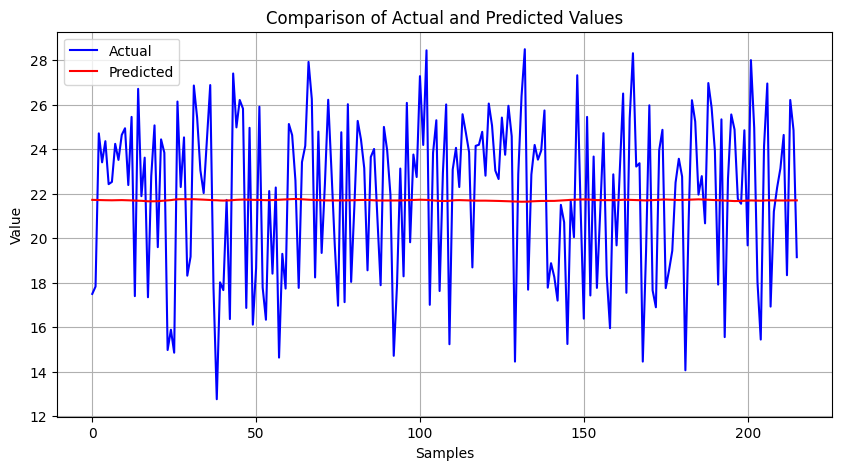

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('GRU_Results_DS2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Adding the first LSTM layer with 200 units
model.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second LSTM layer with 100 units
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third LSTM layer with 50 units, return_sequences=True allows stacking another GRU layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last LSTM layer with 50 units
model.add(LSTM(units=50))  # This is the last LSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_train and y_train are already prepared
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0941
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.0486
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0468
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0471
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0431
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0424
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0463
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0452
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0453
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0442
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0444
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0430
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - loss: 0.0440
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - loss: 0.0438
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - l

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


In [ ]:

pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]

In [ ]:
# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6313
MAE: 3.1664
MAD: 3.1660
MAPE: 15.3869%
R-squared: -0.0083


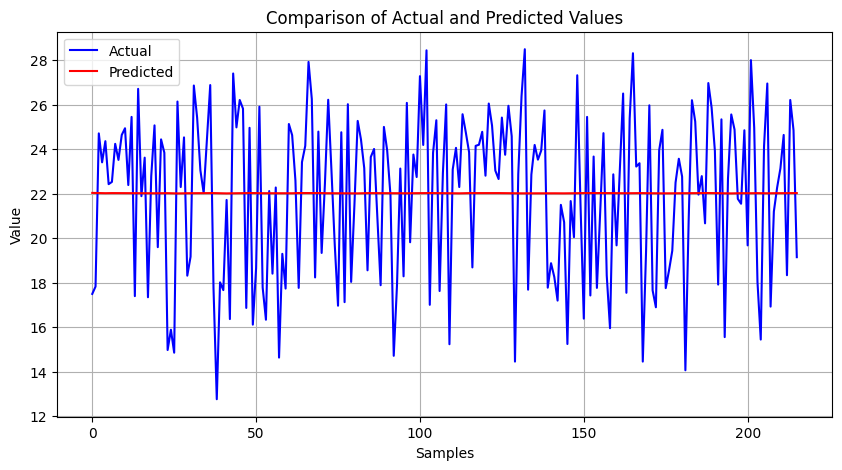

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Random search

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def create_model(lstm_units1=200, lstm_units2=100, lstm_units3=50, lstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        LSTM(units=lstm_units1, return_sequences=True, input_shape=(24, 31)),  # Adjusted input_shape to match X_train
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units2, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units3, return_sequences=True),
        Dropout(rate=dropout_rate),
        LSTM(units=lstm_units4),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for Randomized Search
param_dist = {
    'model__lstm_units1': [100, 200],
    'model__lstm_units2': [50, 100],
    'model__lstm_units3': [25, 50, 75],
    'model__lstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  17.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=50; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  18.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  19.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=50, model__lstm_units4=25; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  19.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  18.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  14.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  16.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  18.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  18.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  23.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=25; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=200, model__lstm_units2=100, model__lstm_units3=25, model__lstm_units4=50; total time=  20.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.1, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=75, model__lstm_units4=25; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__dropout_rate=0.2, model__lstm_units1=100, model__lstm_units2=50, model__lstm_units3=25, model__lstm_units4=50; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__lstm_units4': 25, 'model__lstm_units3': 25, 'model__lstm_units2': 50, 'model__lstm_units1': 200, 'model__dropout_rate': 0.1}
Best score (neg_mean_squared_error): -0.0419748332315024


Best LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

def build_optimized_model():
    model = Sequential([
        LSTM(units=200, return_sequences=True, input_shape=(24, 31)),  # First LSTM layer with 100 units
        Dropout(rate=0.1),  # Dropout for regularization
        LSTM(units=50, return_sequences=True),  # Second LSTM layer with 50 units
        Dropout(rate=0.1),  # Dropout for regularization
        LSTM(units=25, return_sequences=True),  # Third LSTM layer with 25 units
        Dropout(rate=0.1),  # Dropout for regularization
        LSTM(units=25),  # Fourth LSTM layer with 25 units
        Dropout(rate=0.1),  # Dropout for regularization
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the optimized model
model = build_optimized_model()

# Model summary
print(model.summary())


model.fit(X_train, y_train, epochs=50, batch_size=32)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_276 (LSTM)                      │ (None, 24, 200)             │         185,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_284 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_277 (LSTM)                      │ (None, 24, 50)              │          50,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_285 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_278 (LSTM)                      │ (None, 24, 25)              │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_286 (Dropout)                │ (None, 24, 25)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_279 (LSTM)                      │ (None, 25)                  │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_287 (Dropout)                │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,526 (970.80 KB)

 Trainable params: 248,526 (970.80 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.1141
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0475
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - loss: 0.0485
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0442
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0483
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0440
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0448
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0459
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0478
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0460
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0444
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0442
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0446
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0458
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.04

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6684
MAE: 3.2411
MAD: 3.2407
MAPE: 15.5286%
R-squared: -0.0290


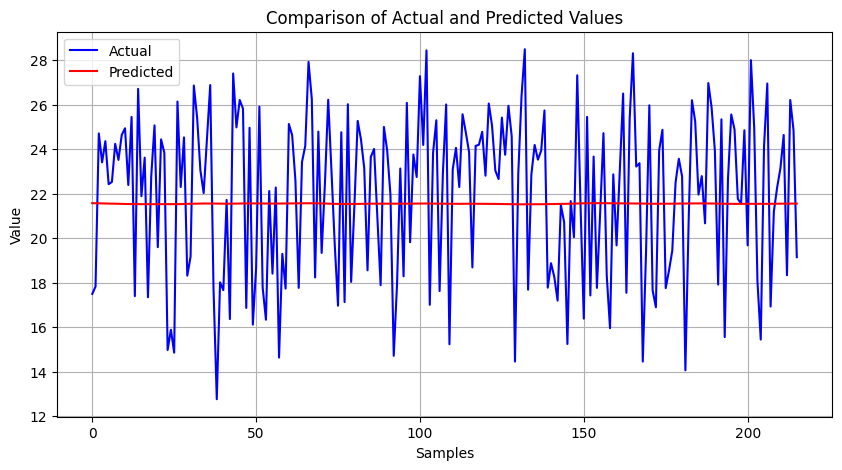

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('LSTM_Results_DS2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BILSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiLSTM layer with 200 units
model.add(Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiLSTM layer with 100 units
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiLSTM layer with 50 units, return_sequences=True allows stacking another BiLSTM layer
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiLSTM layer with 50 units
model.add(Bidirectional(LSTM(units=50)))  # This is the last BiLSTM layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_140 (Bidirectional)    │ (None, 24, 400)             │         371,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_288 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_141 (Bidirectional)    │ (None, 24, 200)             │         400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_289 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_142 (Bidirectional)    │ (None, 24, 100)             │         100,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_290 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_143 (Bidirectional)    │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_291 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,901 (3.56 MB)

 Trainable params: 932,901 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - loss: 0.0916
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - loss: 0.0455
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - loss: 0.0452
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - loss: 0.0474
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - loss: 0.0439
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - loss: 0.0440
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - loss: 0.0469
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step - loss: 0.0488
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - loss: 0.0434
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - loss: 0.0444
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - loss: 0.0423
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - loss: 0.0462
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - loss: 0.0418
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - loss: 0.0430
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6224
MAE: 3.1451
MAD: 3.1510
MAPE: 15.3639%
R-squared: -0.0034


Random search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bilstm_units1=200, bilstm_units2=100, bilstm_units3=50, bilstm_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(LSTM(units=bilstm_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(LSTM(units=bilstm_units4)),  # This last LSTM layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bilstm_units1': [100, 200],
    'model__bilstm_units2': [50, 100],
    'model__bilstm_units3': [25, 50, 75],
    'model__bilstm_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  42.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  42.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  39.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  47.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  49.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  41.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  48.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  41.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=50, model__dropout_rate=0.1; total time=  37.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  53.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  45.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  52.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  44.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  40.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  39.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  41.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  43.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  40.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  28.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  34.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  36.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  34.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=100, model__bilstm_units3=50, model__bilstm_units4=50, model__dropout_rate=0.2; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  29.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  27.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=100, model__bilstm_units2=50, model__bilstm_units3=50, model__bilstm_units4=25, model__dropout_rate=0.1; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  49.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  40.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bilstm_units1=200, model__bilstm_units2=50, model__bilstm_units3=25, model__bilstm_units4=25, model__dropout_rate=0.2; total time=  38.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.2, 'model__bilstm_units4': 50, 'model__bilstm_units3': 25, 'model__bilstm_units2': 50, 'model__bilstm_units1': 200}
Best score (neg_mean_squared_error): -0.04203634232195499


Best BILSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Setting up the model with the best parameters
model = Sequential([
    Bidirectional(LSTM(units=200, return_sequences=True), input_shape=(24, 31)),  # First BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the first layer
    Bidirectional(LSTM(units=50, return_sequences=True)),  # Second BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the second layer
    Bidirectional(LSTM(units=25, return_sequences=True)),  # Third BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the third layer
    Bidirectional(LSTM(units=50)),  # Fourth and last BiLSTM layer
    Dropout(rate=0.2),  # Dropout for the last layer
    Dense(units=1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_144 (Bidirectional)    │ (None, 24, 400)             │         371,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_292 (Dropout)                │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_145 (Bidirectional)    │ (None, 24, 100)             │         180,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_293 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_146 (Bidirectional)    │ (None, 24, 50)              │          25,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_294 (Dropout)                │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_147 (Bidirectional)    │ (None, 100)                 │          40,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_295 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 617,301 (2.35 MB)

 Trainable params: 617,301 (2.35 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 193ms/step - loss: 0.1307
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - loss: 0.0485
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 0.0502
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - loss: 0.0484
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.0459
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - loss: 0.0439
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - loss: 0.0460
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - loss: 0.0453
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 0.0444
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 0.0453
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - loss: 0.0473
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - loss: 0.0428
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 0.0459
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - loss: 0.0460
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 22

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 256ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6142
MAE: 3.0973
MAD: 3.1019
MAPE: 15.2994%
R-squared: 0.0012


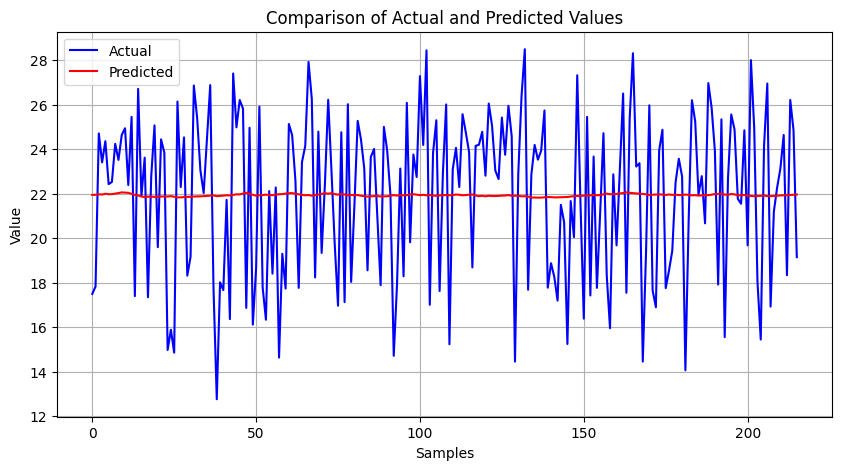

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BILSTM_Results_DS2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **BIGRU**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

model = Sequential()

# Adding the first BiGRU layer with 200 units
model.add(Bidirectional(GRU(units=200, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding a second BiGRU layer with 100 units
model.add(Bidirectional(GRU(units=100, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the third BiGRU layer with 50 units, return_sequences=True allows stacking another BiGRU layer
model.add(Bidirectional(GRU(units=50, return_sequences=True)))
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the last BiGRU layer with 50 units
model.add(Bidirectional(GRU(units=50)))  # This is the last BiGRU layer, so return_sequences is not needed
model.add(Dropout(rate=0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 24, 400)             │         279,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 24, 200)             │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 24, 100)             │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 100)                 │          45,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 702,101 (2.68 MB)

 Trainable params: 702,101 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 218ms/step - loss: 0.2609
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - loss: 0.0552
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 241ms/step - loss: 0.0514
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - loss: 0.0463
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step - loss: 0.0477
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - loss: 0.0466
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - loss: 0.0484
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - loss: 0.0448
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - loss: 0.0480
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - loss: 0.0471
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - loss: 0.0458
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - loss: 0.0461
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 266ms/step - loss: 0.0406
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - loss: 0.0471
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.5980
MAE: 3.0885
MAD: 3.1159
MAPE: 15.3449%
R-squared: 0.0101


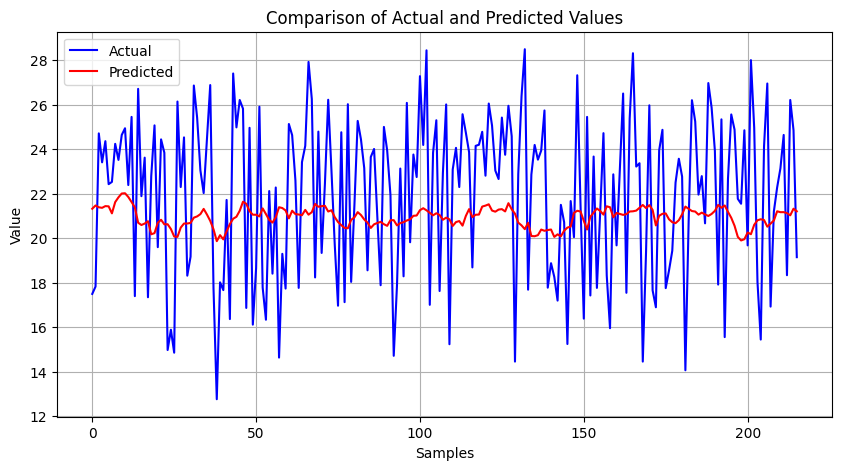

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(bigru_units1=200, bigru_units2=100, bigru_units3=50, bigru_units4=50, dropout_rate=0.1):
    model = Sequential([
        Bidirectional(GRU(units=bigru_units1, return_sequences=True), input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units2, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units3, return_sequences=True)),
        Dropout(rate=dropout_rate),
        Bidirectional(GRU(units=bigru_units4)),  # This last GRU layer does not return sequences
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__bigru_units1': [100, 200],
    'model__bigru_units2': [50, 100],
    'model__bigru_units3': [25, 50, 75],
    'model__bigru_units4': [25, 50],
    'model__dropout_rate': [0.1, 0.2]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  44.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.2; total time=  56.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  55.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  48.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  51.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  45.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  44.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=50, model__dropout_rate=0.1; total time=  47.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  57.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  54.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  46.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  45.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  42.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  56.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  42.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  43.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.1; total time=  43.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  44.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  42.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=100, model__bigru_units3=50, model__bigru_units4=50, model__dropout_rate=0.2; total time=  40.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  32.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  33.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=100, model__bigru_units2=50, model__bigru_units3=50, model__bigru_units4=25, model__dropout_rate=0.1; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  49.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  43.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END model__bigru_units1=200, model__bigru_units2=50, model__bigru_units3=25, model__bigru_units4=25, model__dropout_rate=0.2; total time=  45.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best parameters found:  {'model__dropout_rate': 0.1, 'model__bigru_units4': 25, 'model__bigru_units3': 50, 'model__bigru_units2': 50, 'model__bigru_units1': 100}
Best score (neg_mean_squared_error): -0.043603939279253046


Best BIGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

# Create the model with the optimized parameters
model = Sequential([
    Bidirectional(GRU(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50, return_sequences=True)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50, return_sequences=True)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=25)),
    Dropout(rate=0.1),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Fit the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_128 (Bidirectional)    │ (None, 24, 200)             │          79,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_128 (Dropout)                │ (None, 24, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_129 (Bidirectional)    │ (None, 24, 100)             │          75,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_129 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_130 (Bidirectional)    │ (None, 24, 100)             │          45,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_130 (Dropout)                │ (None, 24, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_131 (Bidirectional)    │ (None, 50)                  │          19,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_131 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,101 (859.77 KB)

 Trainable params: 220,101 (859.77 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 121ms/step - loss: 0.1359
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0529
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0491
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0505
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0517
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0487
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0466
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0437
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0477
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0468
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - loss: 0.0460
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0469
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0.0477
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - loss: 0.0463
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/ste

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.6098
MAE: 3.0446
MAD: 3.0712
MAPE: 15.2985%
R-squared: 0.0036


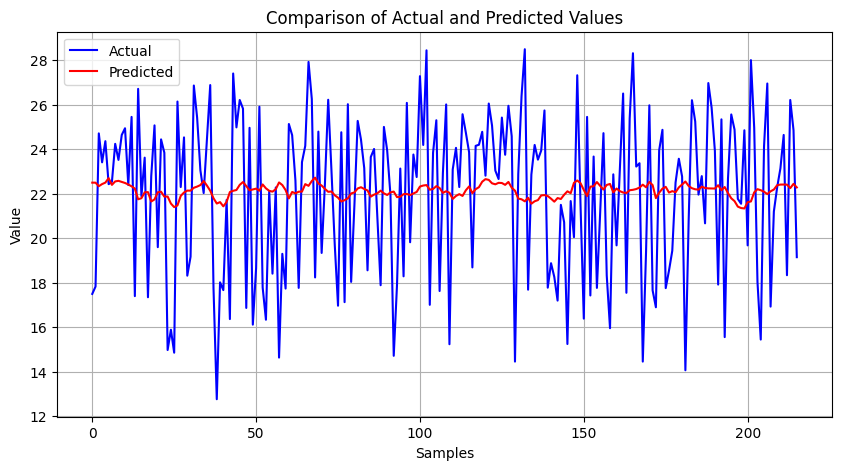

In [ ]:

import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BIGRU_Results_DS2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding a third convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Adding max pooling to reduce dimensionality
model.add(Dropout(0.1))  # Applying 10% dropout

# Flatten the data for the dense layers
model.add(Flatten())

# Adding a dense layer
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))  # Applying 10% dropout

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Train the model (uncomment the line below to train the model with your training data)
model.fit(X_train, y_train, epochs=50, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 22, 64)              │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_132 (Dropout)                │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 20, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_133 (Dropout)                │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 18, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_134 (Dropout)                │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 100)                 │         115,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_135 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,401 (763.29 KB)

 Trainable params: 195,401 (763.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2513
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0465
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0496
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0467
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0499
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0471
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0463
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0451
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0470
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0476
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0477
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0416
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0428
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0406
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0478

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 4.1015
MAE: 3.3577
MAD: 3.3214
MAPE: 16.5387%
R-squared: -0.2863


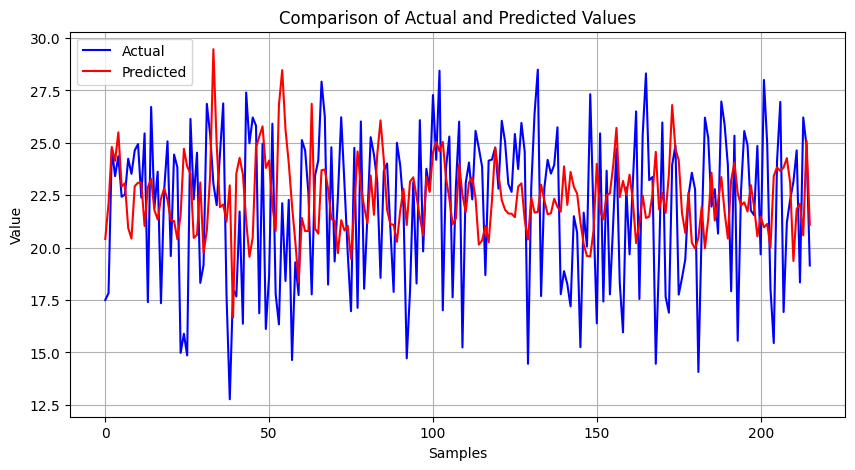

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Random Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

def create_model(filters1=64, filters2=128, kernel_size1=3, kernel_size2=3, dropout_rate=0.1):
    model = Sequential([
        Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=(24, 31)),
        Dropout(rate=dropout_rate),
        Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(rate=dropout_rate),
        Flatten(),
        Dense(units=100, activation='relu'),
        Dropout(rate=dropout_rate),
        Dense(units=1)  # Output layer
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using Scikeras for compatibility with sklearn's RandomizedSearchCV
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0)

# Parameter grid for Randomized Search
param_dist = {
    'model__filters1': [32, 64, 128],
    'model__filters2': [64, 128, 256],
    'model__kernel_size1': [3, 5],
    'model__kernel_size2': [3, 5],
    'model__dropout_rate': [0.1, 0.2, 0.3]
}

# Setup for Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error'
)

# Execute random search
random_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score (neg_mean_squared_error):", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   4.3s
[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=5; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=3; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=128, model__kernel_size1=3, model__kernel_size2=3; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=64, model__kernel_size1=5, model__kernel_size2=3; total time=   8.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=128, model__filters2=128, model__kernel_size1=5, model__kernel_size2=3; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.2, model__filters1=32, model__filters2=256, model__kernel_size1=3, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.3, model__filters1=64, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


[CV] END model__dropout_rate=0.1, model__filters1=32, model__filters2=256, model__kernel_size1=5, model__kernel_size2=5; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Best parameters found:  {'model__kernel_size2': 3, 'model__kernel_size1': 5, 'model__filters2': 256, 'model__filters1': 32, 'model__dropout_rate': 0.1}
Best score (neg_mean_squared_error): -0.04583716736316962


Best CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten

# Constructing the model with the optimal parameters
model = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(24, 31)),
    Dropout(rate=0.1),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(rate=0.1),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dropout(rate=0.1),
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
print(model.summary())

# Optionally, train the model with your training data
model.fit(X_train, y_train, epochs=50, batch_size=32)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_65 (Conv1D)                   │ (None, 20, 32)              │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_229 (Dropout)                │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_66 (Conv1D)                   │ (None, 18, 256)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_32 (MaxPooling1D)      │ (None, 9, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_230 (Dropout)                │ (None, 9, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 100)                 │         230,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_231 (Dropout)                │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 260,425 (1017.29 KB)

 Trainable params: 260,425 (1017.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1995
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0471
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0472
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0475
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0448
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0449
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0443
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0508
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0447
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0504
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0459
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0460
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0439
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0414
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0417

In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))

RMSE: 3.9690
MAE: 3.2711
MAD: 3.2745
MAPE: 16.2689%
R-squared: -0.2045


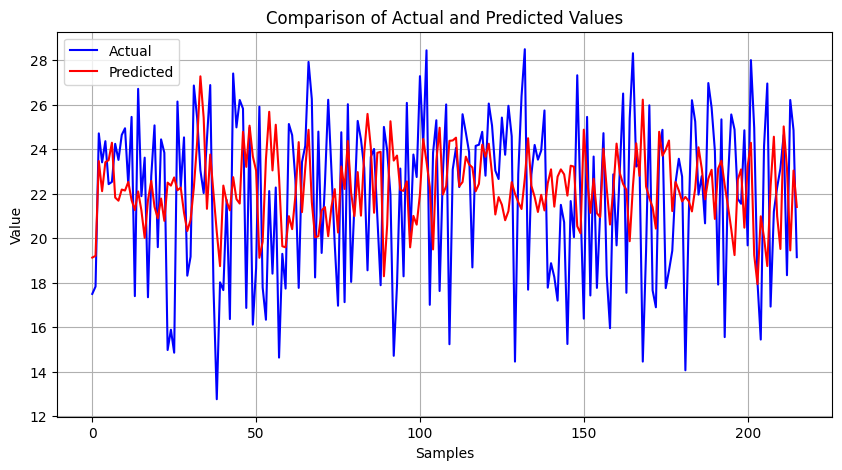

In [ ]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('CNN_Results_DS2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")


Data has been written to Excel successfully.


# **Autoencoder**

In [ ]:
from tensorflow.keras.layers import Input, GRU, Dense, RepeatVector, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential

# Assuming X_train is shaped (samples, timesteps, features)
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]
encoding_dim = 32  # Desired dimensionality of encoded representation

# Encoder
inputs = Input(shape=(timesteps, input_dim))
encoded = Bidirectional(GRU(100, return_sequences=True))(inputs)
encoded = Dropout(0.2)(encoded)
encoded = Bidirectional(GRU(50))(encoded)  # No return_sequences to compress time dimension
encoded = Dropout(0.2)(encoded)
encoder_output = Dense(encoding_dim, activation='relu')(encoded)  # Final encoder output

# Decoder
decoded = RepeatVector(timesteps)(encoder_output)
decoded = Bidirectional(GRU(50, return_sequences=True))(decoded)
decoded = Dropout(0.2)(decoded)
decoded = Bidirectional(GRU(100, return_sequences=True))(decoded)
decoded = Dropout(0.2)(decoded)
decoder_output = TimeDistributed(Dense(input_dim))(decoded)

autoencoder = Model(inputs, decoder_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=2, batch_size=32)

# Extract encoded features using the encoder part of the autoencoder
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)

encoded_X_train = encoder_model.predict(X_train)
# BiGRU model setup
bigru_model = Sequential([
    Bidirectional(GRU(100, return_sequences=True), input_shape=(timesteps, encoding_dim)),
    Dropout(0.1),
    Bidirectional(GRU(50, return_sequences=True)),
    Dropout(0.1),
    Bidirectional(GRU(50, return_sequences=True)),
    Dropout(0.1),
    Bidirectional(GRU(25)),
    Dropout(0.1),
    Dense(1)
])

bigru_model.compile(optimizer='adam', loss='mean_squared_error')
bigru_model.summary()

# Train BiGRU model on the encoded features
bigru_model.fit(encoded_X_train, y_train, epochs=2, batch_size=32)


Epoch 1/2
30/30 [==============================] - 48s 237ms/step - loss: 0.1127
Epoch 2/2
30/30 [==============================] - 4s 35ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirecti  (None, 24, 200)           80400     
 onal)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 24, 200)           0         
                                                                 
 bidirectional_9 (Bidirecti  (None, 24, 100)           75600     
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 24, 100)           0         
                                                                 
 bidirectional_10 (Bidirect  (None, 24, 100

7/7 [==============================] - 7s 61ms/step
RMSE: 3.7464
MAE: 3.3055
MAD: 3.3055
MAPE: 15.7060%
R-squared: -0.0732


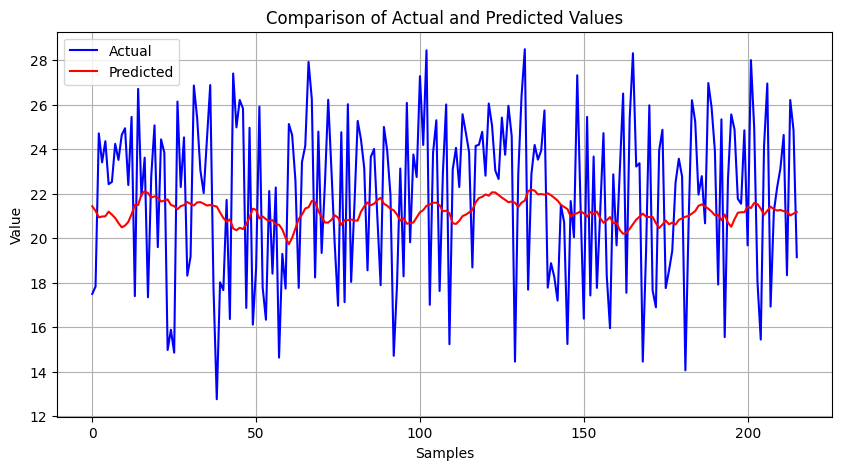

Results saved to Excel successfully.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming sc is an already fitted MinMaxScaler instance
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
lag = 24  # Number of time steps to use as input
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Assuming autoencoder and bigru_model are already trained and encoder_model is defined as before
# Transform the test set using the encoder part of the autoencoder
encoded_X_test = encoder_model.predict(X_test)

# Make predictions using the BiGRU model on the encoded test set
y_pred = bigru_model.predict(encoded_X_test)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Apply inverse transform to predictions
# Apply inverse transform to predictions
pred_full = np.zeros((y_pred_reshaped.shape[0], test_features_scaled.shape[1]))  # Correct dimension
pred_full[:, 0] = y_pred_reshaped.ravel()  # Assuming the target is the first column
y_pred_inverse_full = sc.inverse_transform(pred_full)  # Apply inverse transform
y_pred_inverse = y_pred_inverse_full[:, 0]

# Compare against actual values
real_y = test_df['Y'].values[-len(y_pred):]

# Calculate metrics
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))
mae = mean_absolute_error(real_y, y_pred_inverse)
mad = np.mean(np.abs(real_y - y_pred_inverse))
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y,  # No need to flatten if it's already a 1D array
    'Predicted': y_pred_inverse.flatten()  # Flattening to ensure it's a 1D array
})

# Write the DataFrame to an Excel file
results_df.to_excel('BiGRU_Autoencoder_Results_DS2.xlsx', index=False)
print("Results saved to Excel successfully.")


**Stacking ML with BIGRU**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

# Load or prepare your data (X_train, y_train, X_test, y_test should be defined)
n_components = 12
decision_tree = make_pipeline(PCA(n_components=n_components), DecisionTreeRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=6))
knn = make_pipeline(StandardScaler(), PCA(n_components=n_components), KNeighborsRegressor(n_neighbors=2, p=2, weights='distance'))
svr = make_pipeline(StandardScaler(), PCA(n_components=n_components), SVR(C=88.623, epsilon=0.0207, gamma=0.000394))
# Define and fit the stacking ensemble as before
stacked_model = StackingRegressor(
    estimators=[
        ('knn', knn),
        ('decision_tree', decision_tree),
        ('svr', svr)
    ],
    final_estimator=LinearRegression()
)
stacked_model.fit(X_train, y_train)

# Predictions from the stacked model
stacked_predictions_train = stacked_model.predict(X_train)
stacked_predictions_test = stacked_model.predict(X_test)

# Initialize and fit the MinMaxScaler on stacked training predictions
sc = MinMaxScaler()
stacked_predictions_train_scaled = sc.fit_transform(stacked_predictions_train.reshape(-1, 1))
stacked_predictions_test_scaled = sc.transform(stacked_predictions_test.reshape(-1, 1))

# Assuming the BiGRU expects data reshaped into (samples, timesteps, features)
# Here we treat each prediction as a sequence of length 1 with 1 feature
X_train_bi = stacked_predictions_train_scaled.reshape(-1, 1, 1)
X_test_bi = stacked_predictions_test_scaled.reshape(-1, 1, 1)

# Define and compile the BiGRU model
model = Sequential([
    Bidirectional(GRU(units=100, return_sequences=True), input_shape=(1, 1)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50)),
    Dropout(rate=0.1),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the BiGRU model on scaled stacked outputs
model.fit(X_train_bi, y_train, epochs=5, batch_size=32)

# Evaluate the BiGRU model
y_pred_bi = model.predict(X_test_bi)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_bi))

print(f'Test RMSE: {rmse:.4f}')


Epoch 1/5
30/30 [==============================] - 15s 14ms/step - loss: 447.4724
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 214.6848
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 30.2441
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 8.1150
Epoch 5/5
8/8 [==============================] - 5s 6ms/step
Test RMSE: 2.5266


feature extraxtion

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GRU, Dropout, Dense, Bidirectional

# Assuming train_df is your training DataFrame and test_df is your testing DataFrame

# Scale the features
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(train_df)
test_set_scaled = sc.transform(test_df)

# Prepare training sequences
X_train = []
y_train = []
lag = 24  # Number of time steps to use as input
n_obs = len(training_set_scaled)  # Adjust based on your dataset size after preprocessing

for i in range(lag, n_obs):
    X_train.append(training_set_scaled[i-lag:i, :])
    y_train.append(training_set_scaled[i, 0])  # Assuming the target is at index 0

X_train, y_train = np.array(X_train), np.array(y_train)

# Define the BiGRU model
model = Sequential([
    Bidirectional(GRU(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50, return_sequences=True)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=50, return_sequences=True)),
    Dropout(rate=0.1),
    Bidirectional(GRU(units=25)),  # This layer will not return sequences
    Dropout(rate=0.1),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Create a new model that outputs features from the last GRU layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)

# Extract features from the training set
extracted_features = feature_extractor.predict(X_train)

# Now, extracted_features contains the output of the last GRU layer
# which can be used as input to other models or for analysis

# Preparing test sequences
X_test = []
for i in range(lag, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-lag:i, :])

X_test = np.array(X_test)

# Making predictions on the test data
y_pred_scaled = model.predict(X_test)

# Inverse scaling the predictions to original scale
pred_full = np.zeros((len(y_pred_scaled), training_set_scaled.shape[1]))  # Ensure correct shape
pred_full[:, 0] = y_pred_scaled.ravel()  # Fill predictions in the first column
y_pred = sc.inverse_transform(pred_full)[:, 0]

# Extract the actual target values for the test set
real_y = test_df.iloc[lag:, 0].values  # Adjust the indexing based on how test_df is structured

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred))

# Output the RMSE
print(f'Test RMSE: {rmse:.4f}')


Epoch 1/5
30/30 [==============================] - 31s 196ms/step - loss: 0.0742
Epoch 2/5
30/30 [==============================] - 3s 112ms/step - loss: 0.0517
Epoch 3/5
30/30 [==============================] - 4s 133ms/step - loss: 0.0540
Epoch 4/5
30/30 [==============================] - 3s 99ms/step - loss: 0.0508
Epoch 5/5
7/7 [==============================] - 3s 27ms/step
Test RMSE: 3.6559


In [ ]:
X_train.shape

(958, 31)

# **Ensemble Method**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, RepeatVector, TimeDistributed, Bidirectional, Dropout
from tensorflow.keras.models import Model, Sequential

# Assuming X_train is shaped (samples, timesteps, features)
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]

# Ensemble Model Setup

# Define BiGRU Model
bigru_input = Input(shape=(timesteps, input_dim))
bigru = Bidirectional(GRU(100, return_sequences=True))(bigru_input)
bigru = Dropout(0.1)(bigru)
bigru = Bidirectional(GRU(50, return_sequences=True))(bigru)
bigru = Dropout(0.1)(bigru)
bigru = Bidirectional(GRU(50, return_sequences=True))(bigru)
bigru = Dropout(0.1)(bigru)
bigru = Bidirectional(GRU(25, return_sequences=False))(bigru)
bigru = Dropout(0.1)(bigru)
bigru_output = Dense(1, activation='linear')(bigru)
bigru_model = Model(inputs=bigru_input, outputs=bigru_output)

# Define BiLSTM Model
bilstm_input = Input(shape=(timesteps, input_dim))
bilstm = Bidirectional(LSTM(200, return_sequences=True))(bilstm_input)
bilstm = Dropout(0.2)(bilstm)
bilstm = Bidirectional(LSTM(50, return_sequences=True))(bilstm)
bilstm = Dropout(0.2)(bilstm)
bilstm = Bidirectional(LSTM(25, return_sequences=True))(bilstm)
bilstm = Dropout(0.2)(bilstm)
bilstm = Bidirectional(LSTM(50, return_sequences=False))(bilstm)
bilstm = Dropout(0.2)(bilstm)
bilstm_output = Dense(1, activation='linear')(bilstm)
bilstm_model = Model(inputs=bilstm_input, outputs=bilstm_output)

# Compile both models
bigru_model.compile(optimizer='adam', loss='mean_squared_error')
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train both models (separately for now)
bigru_model.fit(X_train, y_train, epochs=10, batch_size=32)
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/5
30/30 [==============================] - 25s 101ms/step - loss: 0.0859
Epoch 2/5
30/30 [==============================] - 4s 118ms/step - loss: 0.0497
Epoch 3/5
30/30 [==============================] - 3s 111ms/step - loss: 0.0475
Epoch 4/5
30/30 [==============================] - 3s 99ms/step - loss: 0.0477
Epoch 5/5
30/30 [==============================] - 3s 101ms/step - loss: 0.0519
Epoch 1/5
30/30 [==============================] - 14s 105ms/step - loss: 0.0651
Epoch 2/5
30/30 [==============================] - 3s 105ms/step - loss: 0.0512
Epoch 3/5
30/30 [==============================] - 4s 141ms/step - loss: 0.0507
Epoch 4/5
30/30 [==============================] - 3s 113ms/step - loss: 0.0464
Epoch 5/5
30/30 [==============================] - 3s 108ms/step - loss: 0.0464


7/7 [==============================] - 4s 44ms/step
RMSE: 3.6920
MAE: 3.0036
MAD: 3.0036
MAPE: 15.3549%
R-squared: -0.0423


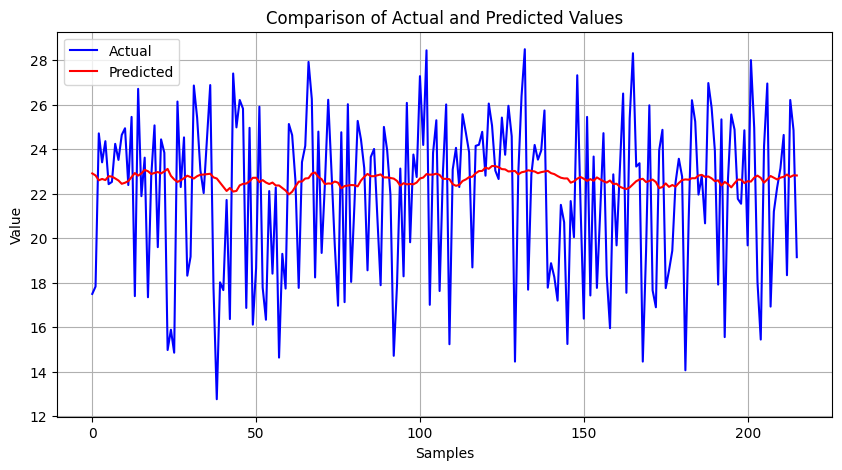

Results saved to Excel successfully.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming sc is an already fitted MinMaxScaler instance
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
lag = 24  # Number of time steps to use as input
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)

# Assuming bigru_model and bilstm_model are already trained
# Make predictions using both models on the test set
bigru_predictions = bigru_model.predict(X_test)
bilstm_predictions = bilstm_model.predict(X_test)

# Averaging ensemble predictions
ensemble_predictions = (bigru_predictions + bilstm_predictions) / 2.0
ensemble_predictions_reshaped = ensemble_predictions.reshape(-1, 1)

# Apply inverse transform to predictions
pred_full = np.zeros((ensemble_predictions_reshaped.shape[0], test_features_scaled.shape[1]))  # Correct dimension
pred_full[:, 0] = ensemble_predictions_reshaped.ravel()  # Assuming the target is the first column
y_pred_inverse_full = sc.inverse_transform(pred_full)  # Apply inverse transform
y_pred_inverse = y_pred_inverse_full[:, 0]

# Compare against actual values
real_y = test_df['Y'].values[-len(ensemble_predictions):]

# Calculate metrics
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))
mae = mean_absolute_error(real_y, y_pred_inverse)
mad = np.mean(np.abs(real_y - y_pred_inverse))
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAD: {mad:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y,  # No need to flatten if it's already a 1D array
    'Predicted': y_pred_inverse.flatten()  # Flattening to ensure it's a 1D array
})

# Write the DataFrame to an Excel file
results_df.to_excel('Ensemble_Results_DS2.xlsx', index=False)
print("Results saved to Excel successfully.")



In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


# **Baysian optimization**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel

class BiGRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Bidirectional(GRU(
            units=hp.Int('units1', min_value=32, max_value=512, step=32),
            return_sequences=True,
            input_shape=self.input_shape
        )))
        model.add(Dropout(rate=hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Bidirectional(GRU(
            units=hp.Int('units2', min_value=32, max_value=512, step=32),
            return_sequences=False
        )))
        model.add(Dropout(rate=hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(1, activation='linear'))  # Change activation based on your needs

        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='mean_squared_error',
            metrics=['mean_squared_error']
        )
        return model

# Assuming X_train.shape[1:] gives the input shape for the model
hypermodel = BiGRUHyperModel(input_shape=X_train.shape[1:])


<ipython-input-31-c18667c7e107>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:
from kerastuner.tuners import BayesianOptimization

tuner = BayesianOptimization(
    hypermodel,
    objective='val_mean_squared_error',
    max_trials=5,  # Set more trials for a more thorough search
    executions_per_trial=2,
    directory='hyperparameter_tuning',
    project_name='BiGRU_Tuning'
)

# Start tuning with a validation split
tuner.search(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print('Best units first layer:', best_hps.get('units1'))
print('Best dropout first layer:', best_hps.get('dropout1'))
print('Best units second layer:', best_hps.get('units2'))
print('Best dropout second layer:', best_hps.get('dropout2'))
print('Best learning rate:', best_hps.get('learning_rate'))


Trial 5 Complete [00h 02m 57s]
val_mean_squared_error: 0.03967990353703499

Best val_mean_squared_error So Far: 0.03871992416679859
Total elapsed time: 00h 12m 30s
Best units first layer: 288
Best dropout first layer: 0.0
Best units second layer: 128
Best dropout second layer: 0.1
Best learning rate: 0.00048467141838873354


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train, y_train, epochs=5, validation_split=0.2, batch_size=32)


Epoch 1/5
24/24 [==============================] - 11s 218ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 2/5
24/24 [==============================] - 3s 140ms/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 3/5
24/24 [==============================] - 3s 138ms/step - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 4/5
24/24 [==============================] - 4s 165ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 5/5
24/24 [==============================] - 3s 139ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.0400 - val_mean_squared_error: 0.0400


7/7 [==============================] - 0s 63ms/step
RMSE: 3.8353
MAE: 3.4039
MAD: 3.4028
MAPE: 15.9088%
R-squared: -0.1248


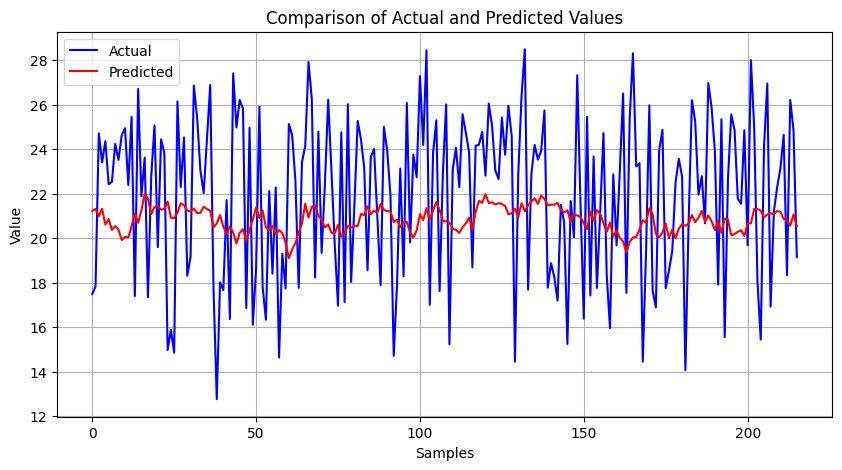

Data has been written to Excel successfully.


In [ ]:
test_features_scaled = sc.transform(test_df)

# Prepare sequences for testing
X_test = []
for i in range(lag, len(test_features_scaled)):
    X_test.append(test_features_scaled[i-lag:i])  # Use all features

X_test = np.array(X_test)


# Make predictions
y_pred = best_model.predict(X_test)




pred_full = np.zeros((y_pred.shape[0], 31))  # 31 for the number of features you have

# Assuming Y is the first column, fill in your predictions there
pred_full[:, 0] = y_pred.ravel()  # Use ravel() to ensure it's a 1D array

# Perform the inverse transformation
pred_full_inverse = sc.inverse_transform(pred_full)

# Extract the Y predictions after inverse transforming
y_pred_inverse = pred_full_inverse[:, 0]


# Assuming dataset_test is your test DataFrame and it's already preprocessed to drop NaNs as before
real_y = test_df['Y'].values[-len(y_pred):]  # Make sure to align the lengths

# Ensure it is properly shaped for comparison
# If necessary, reshape it (though it should already be a 1D array matching y_pred_inverse in length)
real_y = real_y.reshape(-1, 1)


#Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(real_y, y_pred_inverse))

# Calculate MAE
mae = mean_absolute_error(real_y, y_pred_inverse)

# Calculate MAD
mad = np.mean(np.abs(real_y - y_pred_inverse))

# Calculate MAPE - Note: You have to ensure it does not contain zeros to avoid division by zero
mape = np.mean(np.abs((real_y - y_pred_inverse) / real_y)) * 100

# Calculate R-squared
r2 = r2_score(real_y, y_pred_inverse)

# Print the results
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('MAD: {:.4f}'.format(mad))
print('MAPE: {:.4f}%'.format(mape))
print('R-squared: {:.4f}'.format(r2))


import matplotlib.pyplot as plt

# Plotting the real vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(real_y, label='Actual', color='blue')
plt.plot(y_pred_inverse, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


import pandas as pd

# Create a DataFrame with the actual and predicted values
results_df = pd.DataFrame({
    'Actual': real_y.flatten(),  # Flattening if necessary
    'Predicted': y_pred_inverse.flatten()
})


# Write the DataFrame to an Excel file
with pd.ExcelWriter('BIGRU_Baysian_Results_DS2.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Predictions', index=False)

print("Data has been written to Excel successfully.")
